In [2]:
import pandas as pd
import numpy as np
import random
import string
from itertools import combinations, permutations


import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [49]:
good_match = pd.read_csv('./successful_match.csv', index_col=0)
good_match.head()

,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,SNS공유,...,주요목적기타,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트,loc1,popularity,loc,co2
0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",711,...,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...,15,0.181400,"('126.9363164', '33.4621574')",7.606409
1,사려니숲길,제주시 > 조천,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,제주특별자치도 제주시 조천읍 교래리 산 137-1,213,"2,985",503,11,"700,036","1,125",...,NaN,NaN,NaN,화장실,NaN,"상세정보\n확장됨\n\n사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를...",1,0.088928,"('126.6424787', '33.4077504')",NaN
2,카멜리아힐,서귀포시 > 안덕,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,제주특별자치도 서귀포시 안덕면 병악로 166,156,"2,988",473,14,"210,066",200,...,NaN,2~3시간,중,"공용주차장,현금결제,카드결제,화장실",NaN,상세정보\n확장됨\n\n카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터...,8,0.469658,"('126.3683652', '33.2901402')",3.687691
3,협재해수욕장,제주시 > 한림,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,제주특별자치도 제주시 한림읍 한림로 329-10,158,"2,614",452,12,"251,116",238,...,NaN,1~2시간,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n제주도 서쪽에 가볼만한 해수욕장을 꼽으라 하면 단연 1,2위...",5,0.449303,"('126.2394319', '33.3937480')",NaN
4,월정리해변,제주시 > 구좌,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,제주특별자치도 제주시 구좌읍 월정리 33-3,99,"2,360",441,2,"175,587",124,...,NaN,NaN,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설",NaN,상세정보\n확장됨\n\n 제주도의 동쪽에 위치하고 있는 마을인 '월정리'는 '달이...,16,0.579155,"('126.7986579', '33.5551082')",NaN


# 관광지 탄소배출량-여행루트 

## 비짓제주 크롤링과 c3 월평균 탄배 매칭 데이터 -카테고리 나누기 

In [51]:
good_match_detail=good_match.loc[good_match['co2'].isnull()==False, ['이름','주소','태그','주요목적','주요목적기타','co2']]

In [52]:
good_match_detail.rename(columns = {'이름':'AREA_NM'},inplace=True)

In [53]:
tour=good_match_detail.copy()

In [54]:
tour.head()

,AREA_NM,주소,태그,주요목적,주요목적기타,co2
0,성산일출봉(UNESCO 세계자연유산),제주특별자치도 서귀포시 성산읍 일출로 284-12,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,등산,산책로. 올레코스. 오름,7.606409
2,카멜리아힐,제주특별자치도 서귀포시 안덕면 병악로 166,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,"공연/전시,포토스팟",NaN,3.687691
5,함덕해수욕장,제주특별자치도 제주시 조천읍 조함해안로 519-10,#해수욕장 #액티비티 #아이\n#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 ...,NaN,NaN,9.377186
6,산굼부리,제주특별자치도 제주시 조천읍 비자림로 768,#오름 #걷기/등산 #친구\n#맑음 #가을 #우수관광사업체 #자연경관 #억새,등산,"산책로, 등산로",6.074776
8,섭지코지,제주특별자치도 서귀포시 성산읍 섭지코지로 107,#일출 #해변 #경관/포토\n#커플 #맑음 #가을 #자연경관 #포토스팟 #봄꽃 #유채꽃,"등산,기타",산책로,224.019160


In [55]:
tour.loc[tour[tour['주요목적'].str.contains('공연/전시',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크'
tour.loc[tour[tour['주요목적'].str.contains('체험',na=False)].index,'lg_cat'] = '체험'


#주요목적 나와있으면 

tour.loc[tour[tour['주요목적'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='등산'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='수렵,체험'].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['주요목적']=='체험'].index,'lg_cat'] = '레저/체험' #요가 잇음
tour.loc[tour[tour['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='기타,포토스팟'].index,'lg_cat'] = '자연' #용두암
tour.loc[tour[tour['주요목적']=='해양스포츠,물놀이,포토스팟'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='포토스팟,공연/전시'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='공연/전시,포토스팟'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='공연/전시,기타'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='공연/전시,체험'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='포토스팟,기타'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='해양스포츠,체험'].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['주요목적']=='해양스포츠,체험'].index,'md_cat'] = '해양레저'




#주요 목적 null 인 경우

tour.loc[tour[tour['AREA_NM'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['AREA_NM'].str.contains('해수욕장',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['AREA_NM'].str.contains('공원',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'





tour.loc[tour[tour['AREA_NM'].str.contains('체험관',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('공방',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('유람선',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('유람선',na=False)].index,'md_cat'] = '유람선&잠수함'
tour.loc[tour[tour['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'
tour.loc[tour[tour['AREA_NM'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['AREA_NM'].str.contains('뮤지엄',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['AREA_NM'].str.contains('골프',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('골프',na=False)].index,'md_cat'] = '골프장'
tour.loc[tour[tour['AREA_NM'].str.contains('거리',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['AREA_NM'].str.contains('해안',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour.loc[tour[tour['AREA_NM'].str.contains('섬',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('요가',na=False)].index,'md_cat'] ='헬스케어'



tour.loc[tour[tour['태그'].str.contains('도보',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('미술관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '공연/전시'

tour.loc[tour[tour['태그'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('등산',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('등산',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['태그'].str.contains('테마공원',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour.loc[tour[tour['태그'].str.contains('수상레저',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('수상레저',na=False)].index,'md_cat'] = '해양레저'
tour.loc[tour[tour['태그'].str.contains('레저/체험',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('체험',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('계곡',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('올레',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('올레',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('마을관광',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour.loc[tour[tour['태그'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('섬',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['태그'].str.contains('섬',na=False)].index,'md_cat'] ='바다'
tour.loc[tour[tour['태그'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('공연',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('항구',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('항구',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour.loc[tour[tour['태그'].str.contains('골프',na=False)].index,'md_cat'] = '골프'
tour.loc[tour[tour['태그'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'

tour.loc[tour[tour['AREA_NM'].str.contains('해안도로',na=False)].index,'md_cat'] = '드라이브'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('다원',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour.loc[tour[tour['AREA_NM'].str.contains('숲',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('스파',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('전시관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['AREA_NM'].str.contains('전시관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['AREA_NM'].str.contains('체험장',na=False)].index,'lg_cat'] = '레저/체험'


tour.loc[tour[tour['태그'].str.contains('자연경관',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('오름',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('오름',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['AREA_NM'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('폭포',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('계곡',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['AREA_NM'].str.contains('폭포',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['AREA_NM'].str.contains('승마',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour.loc[tour[tour['AREA_NM'].str.contains('요트',na=False)].index,'md_cat'] = '해양레저'
tour.loc[tour[tour['AREA_NM'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'
tour.loc[tour[tour['AREA_NM'].str.contains('잠수함',na=False)].index,'md_cat'] = '유람선&잠수함'
tour.loc[tour[tour['AREA_NM'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크/테마관광지'

tour.loc[tour[tour['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['태그'].str.contains('역사유적',na=False)].index,'md_cat'] = '유적지'

tour.loc[tour[tour['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour.loc[tour[tour['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour.loc[tour[tour['태그'].str.contains('체험농장',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('체험농장',na=False)].index,'md_cat'] = '체험농장'
tour.loc[tour[tour['태그'].str.contains('승마',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour.loc[tour[tour['AREA_NM'].str.contains('목장',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('농장',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('목장',na=False)].index,'md_cat'] ='체험농장'
tour.loc[tour[tour['AREA_NM'].str.contains('농장',na=False)].index,'md_cat'] ='체험농장'







tour.loc[37,'lg_cat'] = '공연/전시'
tour.loc[98,'lg_cat'] = '자연'
tour.loc[118,'lg_cat'] = '자연'
tour.loc[98,'md_cat'] = '산'
tour.loc[118,'md_cat'] = '산'
tour.loc[151,'lg_cat'] = '자연'
tour.loc[151,'md_cat'] = '산'

tour.loc[163,'lg_cat'] = '자연'
tour.loc[169,'lg_cat'] = '자연'
tour.loc[168,'md_cat'] = '바다'

tour.loc[241,'lg_cat'] = '자연'
tour.loc[241,'md_cat'] = '바다'
tour.loc[119,'md_cat'] = '바다'

tour.loc[267,'lg_cat'] = '공연/전시'

tour.loc[271,'lg_cat'] = '자연'
tour.loc[271,'md_cat'] = '산'

tour.loc[293,'lg_cat'] = '공연/전시'

tour.loc[38,'lg_cat'] = '레저/체험'
tour.loc[38,'md_cat'] = '전망대'

tour.loc[583,'lg_cat'] = '레저/체험'
tour.loc[583,'md_cat'] = '헬스케어'


tour.loc[586,'lg_cat'] = '레저/체험'
tour.loc[586,'md_cat'] = '전망대'
tour.loc[630,'lg_cat'] = '공연/전시'
tour.loc[646,'lg_cat'] = '공연/전시'


tour.loc[773,'lg_cat'] = '자연'
tour.loc[56,'lg_cat'] = '테마파크/테마관광지'
tour.loc[773,'md_cat'] = '바다'
tour.loc[809,'lg_cat'] = '레저/체험'
tour.loc[809,'md_cat'] = '헬스케어'

tour.loc[1008,'lg_cat'] = '공연/전시'
tour.loc[602,'lg_cat'] = '공연/전시'
tour.loc[861,'lg_cat'] = '공연/전시'
tour.loc[1014,'lg_cat'] = '공연/전시'



tour.drop(59,axis=0,inplace=True)
tour.drop(428,axis=0,inplace=True)

tour.drop(832,axis=0,inplace=True)
tour.drop(1012,axis=0,inplace=True)

tour.drop(168,axis=0,inplace=True)
tour.drop(119,axis=0,inplace=True)
tour.drop(707,axis=0,inplace=True)



tour.loc[583,'lg_cat'] = '레저/체험'
tour.loc[583,'md_cat'] = '헬스케어'



air=tour.loc[tour['태그'].str.contains('의료관광',na=False)].index
# cafe=tour.loc[tour['태그'].str.contains('카페',na=False)].index
tour.drop(air,axis=0,inplace=True)#공항
# tour.drop(cafe,axis=0,inplace=True)

In [375]:
len(tour[tour['lg_cat'].isnull()])

0

In [56]:
index=(tour[(tour['lg_cat']=='테마파크/테마관광지')& (tour['md_cat']!='유적지')]).index

In [57]:
tour.loc[index,'md_cat']='유적지외'

In [58]:
tour.loc[tour['lg_cat']=='테마파크/테마관광지']['md_cat'].value_counts()

유적지외    54
유적지     50
Name: md_cat, dtype: int64

In [59]:
tour[tour['md_cat']=='체험농장']['AREA_NM']

42           성이시돌목장
67           아침미소목장
464       도치돌 알파카목장
542     제주어울림감귤체험농장
1058        해품은체험농장
1063        해품은체험농장
Name: AREA_NM, dtype: object

## 유람선잠수함 CO2 수정 

In [60]:
tour.loc[tour['md_cat']=='유람선&잠수함','co2']= 11.145797+168.35
tour[tour['md_cat']=='유람선&잠수함']

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
107,서귀포잠수함(대국해저관광),제주특별자치도 서귀포시 남성중로 40,#액티비티 #커플 #아이\n#우수관광사업체 #체험 #레저/체험 #어린이 #수상레저 ...,NaN,NaN,179.495797,레저/체험,유람선&잠수함
195,우도잠수함(제주씨월드),제주특별자치도 서귀포시 성산읍 성산등용로 130-21,#액티비티 #부모 #아이\n#체험 #레저/체험 #어린이 #수상레저 #어트랙션,NaN,NaN,179.495797,레저/체험,유람선&잠수함
200,우도잠수함(제주씨월드),제주특별자치도 서귀포시 성산읍 성산등용로 130-21,#액티비티 #부모 #아이\n#체험 #레저/체험 #어린이 #수상레저 #어트랙션,NaN,NaN,179.495797,레저/체험,유람선&잠수함
389,그린크루즈(산방산유람선),제주특별자치도 서귀포시 안덕면 화순해안로106번길 16,#경관/포토 #부모 #맑음\n#봄 #포토스팟,NaN,NaN,179.495797,레저/체험,유람선&잠수함
394,그린크루즈(산방산유람선),제주특별자치도 서귀포시 안덕면 화순해안로106번길 16,#경관/포토 #부모 #맑음\n#봄 #포토스팟,NaN,NaN,179.495797,레저/체험,유람선&잠수함


## Co2 검증 

### 자연

In [61]:
def find_outlier_by_Tukey(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3-q1
    
   
    upper_bound = q3 + (iqr * 1.5)
    print(upper_bound)
  
    mask = np.where(data>upper_bound)
    return mask

<AxesSubplot:xlabel='co2'>

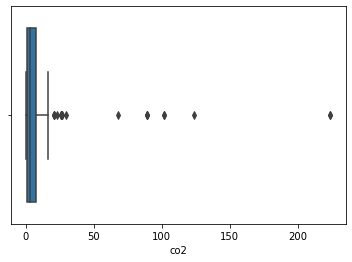

In [62]:
sns.boxplot(tour.loc[tour['lg_cat']=='자연','co2'])

In [63]:
find_outlier_by_Tukey(tour.loc[tour['md_cat']=='산','co2'])

20.712866718045454


(array([ 7, 16, 19, 23, 29, 34, 42, 46, 60], dtype=int64),)

In [64]:
find_outlier_by_Tukey(tour.loc[tour['md_cat']=='바다','co2'])

10.110469338868361


(array([ 1, 11, 12, 21, 29, 42, 45], dtype=int64),)

In [65]:
mountain_mean=tour[tour['md_cat']=='산']
mountain_mean.sort_values('co2',ascending=False)
mountain_mean.drop([407,901,30,126,552,188,353,587,148],inplace=True)
mountain_mean.sort_values('co2',ascending=False)
print("산 이상치 제거 평균: ",mountain_mean['co2'].mean())


sea_mean=tour[tour['md_cat']=='바다']
sea_mean.sort_values('co2',ascending=False)
sea_mean.drop([128,8,311,992,419,125,840],inplace=True)
sea_mean.sort_values('co2',ascending=False)
print("바다 이상치 제거 평균: ",sea_mean['co2'].mean())




tour.loc[[407,901,30,126,552,188,353,587,148],'co2']= mountain_mean['co2'].mean()
tour.loc[[128,8,311,992,419,125,840],'co2']= sea_mean['co2'].mean()




산 이상치 제거 평균:  4.831688882772545
바다 이상치 제거 평균:  1.6391605130657607


In [66]:
find_outlier_by_Tukey(tour.loc[tour['lg_cat']=='자연','co2'])

12.506679536136364


(array([  5,  27,  62,  72,  91,  92, 121, 141, 155], dtype=int64),)

In [67]:
tour[tour['lg_cat']=='자연'].sort_values('co2',ascending=False)

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
779,서귀포 하영올레,제주특별자치도 서귀포시 중앙로 105,#휴식/힐링 #휴식/치유 #자연경관\n#체험 #도보여행 #도보,NaN,NaN,88.982117,자연,NaN
945,제주신화전설탐방로,제주특별자치도 서귀포시 안덕면 녹차분재로 218,#부모 #혼자 #커플\n#친구 #아이 #제주신화 #신화탐방로 #신나락만나락 #자연경...,NaN,NaN,67.546119,자연,NaN
294,협재굴(한림공원),제주특별자치도 제주시 한림읍 한림로 300,#동굴 #경관/포토 #부모\n#흐림 #자연경관 #포토스팟,NaN,NaN,20.802554,자연,NaN
1074,황금굴(한림공원),제주특별자치도 제주시 한림읍 한림로 300,#여름 #경관/포토 #부모\n#아이 #친구 #동굴 #자연경관 #포토스팟 #어린이,NaN,NaN,20.802554,자연,NaN
513,쌍용굴(한림공원),제주특별자치도 제주시 한림읍 한림로 300,#동굴 #경관/포토 #부모\n#흐림 #여름 #자연경관 #포토스팟,NaN,NaN,20.802554,자연,NaN
...,...,...,...,...,...,...,...,...
970,제주해양레저,제주특별자치도 서귀포시 중문관광로 192,#해수욕장 #액티비티 #맑음\n#체험 #레저/체험 #해변 #물놀이 #수상레저 #어트랙션,NaN,NaN,0.026110,자연,바다
363,엉덩물계곡,제주특별자치도 서귀포시 중문관광로 192,#부모 #커플 #혼자\n#친구 #아이 #맑음 #봄 #올레 #계곡 #자연경관 #어린이...,NaN,NaN,0.026110,자연,산
396,노을해안로,제주특별자치도 서귀포시 대정읍 노을해안로 24,#일몰 #해변 #걷기/등산\n#혼자 #가을 #자연경관,NaN,NaN,0.005315,자연,바다
700,마라도 섬투어,제주특별자치도 서귀포시 대정읍 마라로 65,#겨울 #마라도 #자연경관\n#체험 #도보 #도보여행 #언택트 #포토스팟 #섬속의섬...,NaN,NaN,0.000000,자연,바다


In [68]:
nature_mean=tour[tour['lg_cat']=='자연']
nature_mean.drop([779,945,294,1074,513],inplace=True)
print("자연&md_cat nan 이상치 제거 평균: ",nature_mean['co2'].mean())
tour.loc[[779,945,294,1074,513],'co2']= nature_mean['co2'].mean()



자연&md_cat nan 이상치 제거 평균:  3.411126292990945


### 공연/전시

In [69]:
tour[tour['lg_cat']=='공연/전시']['md_cat'].value_counts()

Series([], Name: md_cat, dtype: int64)

In [70]:
find_outlier_by_Tukey(tour.loc[tour['lg_cat']=='공연/전시','co2'])

23.702470111078412


(array([ 3,  5, 16, 28, 30, 31], dtype=int64),)

In [71]:
tour[tour['lg_cat']=='공연/전시'].sort_values('co2',ascending=False)

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
553,지포뮤지엄,제주특별자치도 서귀포시 성산읍 섭지코지로 107,#실내 #미술/박물관 #친구\n#커플 #비.눈 #사계절 #실내관광지 #어트랙션,NaN,NaN,224.019160,공연/전시,NaN
568,포도갤러리 in 포도호텔,제주특별자치도 서귀포시 안덕면 산록남로 863 포도호텔 지하1층,#예술 #실내 #미술/박물관\n#비.눈 #겨울 #실내관광지 #문화관광 #호텔 #어트랙션,NaN,NaN,123.678259,공연/전시,NaN
131,제주항공우주박물관,제주특별자치도 서귀포시 안덕면 녹차분재로 218 항곡우주박물관,#실내 #미술/박물관 #아이\n#비.눈 #겨울 #우수관광사업체 #실내관광지 #문화관...,공연/전시,NaN,67.546119,공연/전시,NaN
534,제주난타,제주특별자치도 제주시 선돌목동길 56-26,#공연 #실내 #여자\n#남자 #부모 #친구 #커플 #전시/행사 #비/바람/눈 #실...,NaN,NaN,59.485328,공연/전시,NaN
267,제주국제컨벤션센터 icc,제주특별자치도 서귀포시 중문관광로 224,#실내 #친구 #비.눈\n#사계절 #실내관광지 #어트랙션,NaN,NaN,47.282826,공연/전시,NaN
105,제주특별자치도 도립미술관,제주특별자치도 제주시 1100로 2894-78,#예술 #미술/박물관 #실내\n#사계절 #커플 #혼자 #실내관광지 #미술관 #문화관...,공연/전시,NaN,44.130840,공연/전시,NaN
581,SM 디지털아트 뮤지엄,제주특별자치도 제주시 애월읍 애월해안로 516-7,#부모 #커플 #혼자\n#친구 #아이 #사계절 #실내관광지 #문화관광 #어린이 #어트랙션,NaN,NaN,23.279323,공연/전시,NaN
249,서귀포천문과학문화관,제주특별자치도 서귀포시 1100로 506-1,#밤 #실내 #미술/박물관\n#겨울 #실내관광지 #어트랙션,공연/전시,NaN,19.325924,공연/전시,NaN
369,제주세계자연유산센터,제주특별자치도 제주시 조천읍 선교로 569-36,#흐림 #가을 #실내관광지\n#어트랙션 #유네스코,공연/전시,NaN,16.191562,공연/전시,NaN
378,제주세계자연유산센터,제주특별자치도 제주시 조천읍 선교로 569-36,#흐림 #가을 #실내관광지\n#어트랙션 #유네스코,공연/전시,NaN,16.191562,공연/전시,NaN


In [72]:
museum_mean=tour[tour['lg_cat']=='공연/전시']
museum_mean.drop([553,568,131,534,267,105],inplace=True)
print("공연/전시 이상치 제거 평균: ",museum_mean['co2'].mean())
tour.loc[[553,568,131,534,267,105],'co2']= museum_mean['co2'].mean()



공연/전시 이상치 제거 평균:  5.3393316432910085


### 레저체험

In [73]:
tour[tour['lg_cat']=='레저/체험']['md_cat'].value_counts()

해양레저       11
헬스케어       11
승마         10
캠핑          9
체험농장        6
드라이브        5
유람선&잠수함     5
골프          4
공방          3
전망대         2
Name: md_cat, dtype: int64

In [74]:
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='해양레저','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='헬스케어','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='승마','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='캠핑','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='체험농장','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='드라이브','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='유람선&잠수함','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='골프','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='공방','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='전망대','co2']))

13.67633648319238
(array([], dtype=int64),)
155.0500551982
(array([10], dtype=int64),)
51.28682103677144
(array([1], dtype=int64),)
3.5189549563166658
(array([3], dtype=int64),)
18.396979787875
(array([], dtype=int64),)
1.6158119544590912
(array([4], dtype=int64),)
179.49579699999998
(array([], dtype=int64),)
221.9412686175682
(array([], dtype=int64),)
6.2202465864750005
(array([], dtype=int64),)
66.9083841380909
(array([], dtype=int64),)


In [75]:
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='해양레저','co2']))
print(find_outlier_by_Tukey(tour.loc[tour['md_cat']=='헬스케어','co2']))

13.67633648319238
(array([], dtype=int64),)
155.0500551982
(array([10], dtype=int64),)


In [76]:
health=tour[tour['md_cat']=='헬스케어']
health.drop([1078],inplace=True)
print("헬스케어 이상치 제거 평균: ",health['co2'].mean())
tour.loc[[1078],'co2']= health['co2'].mean()

horse=tour[tour['md_cat']=='승마']
horse.drop([219],inplace=True)
print("승마 이상치 제거 평균: ",horse['co2'].mean())
tour.loc[[219],'co2']= horse['co2'].mean()

camping=tour[tour['md_cat']=='캠핑']
camping.drop([783],inplace=True)
print("캠핑 이상치 제거 평균: ",camping['co2'].mean())
tour.loc[[783],'co2']= camping['co2'].mean()

drive=tour[tour['md_cat']=='드라이브']
drive.drop([1071],inplace=True)
print("드라이브 이상치 제거 평균: ",drive['co2'].mean())
tour.loc[[1071],'co2']= drive['co2'].mean()




헬스케어 이상치 제거 평균:  28.627041274004547
승마 이상치 제거 평균:  6.519183083334583
캠핑 이상치 제거 평균:  0.6520268122049242
드라이브 이상치 제거 평균:  0.5728437187159091


In [77]:
tour[tour['md_cat']=='헬스케어'].sort_values('co2',ascending=False)

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
583,WE호텔 웰니스센터,제주특별자치도 서귀포시 1100로 453-95,#웰니스 #뷰티 #스파\n#테라피 #헬스케어 #호텔 #어트랙션,NaN,NaN,116.255621,레저/체험,헬스케어
671,더힐하우스스파,제주특별자치도 제주시 한림읍 한창로 925-122,#힐링 #스파 #어트랙션,NaN,NaN,63.874207,레저/체험,헬스케어
679,더힐하우스스파,제주특별자치도 제주시 한림읍 한창로 925-122,#힐링 #스파 #어트랙션,NaN,NaN,63.874207,레저/체험,헬스케어
1078,휘닉스 르쏠레이테라피,제주특별자치도 서귀포시 성산읍 섭지코지로 107 휘닉스제주아일랜드리조트 블루동 1층,#스파 #체험 #호텔\n#어트랙션,NaN,NaN,28.627041,레저/체험,헬스케어
831,씨에스호텔 프라이빗스파,제주특별자치도 서귀포시 중문관광로 198,#씨에스호텔 #프라이빗스파 #스파\n#호텔 #어트랙션,NaN,NaN,19.871126,레저/체험,헬스케어
698,로로 요가,제주특별자치도 제주시 조천읍 조함해안로 519-10,#친구 #혼자 #맑음\n#휴식/힐링 #요가 #패들요가 #어트랙션,체험,"패들보드, 요가",9.377186,레저/체험,헬스케어
735,밸런싱 요가,제주특별자치도 제주시 중앙로 492,#혼자 #필라테스 #메디컬요가\n#요가 #어트랙션,체험,"요가, 기구 필라테스, 메디컬 요가",5.961223,레저/체험,헬스케어
760,쁘램 요가,제주특별자치도 제주시 연북로 88,#혼자 #휴식/힐링 #요가\n#플라잉요가 #메디컬요가 #빈야사요가 #하타요가 #테랍...,체험,"플라잉요가, 메디컬 요가, 빈야사 요가, 테랍툴 요가, 하타요가",5.463429,레저/체험,헬스케어
809,송악힐링풋스킨,제주특별자치도 서귀포시 대정읍 송악관광로 399,#휴식/힐링 #어트랙션,NaN,NaN,0.717186,레저/체험,헬스케어
729,바릇스파,제주특별자치도 제주시 한림읍 한림로 392 3층,#스파 #필링 #어트랙션,NaN,NaN,0.473431,레저/체험,헬스케어


In [78]:
find_outlier_by_Tukey(tour.loc[tour['lg_cat']=='레저/체험','co2'])

21.15439524972046


(array([  6,  10,  11,  12,  20,  24,  25,  41,  42,  43,  44,  53,  54,
         55,  56,  60,  77,  82,  93,  94, 101, 113], dtype=int64),)

In [79]:
leisure_mean=tour[tour['lg_cat']=='레저/체험']
leisure_mean.drop([877,678,670,706,560,952,934],inplace=True)
print('레저/체험&md_cat nan 이상치 제거 평균:',leisure_mean['co2'].mean())
tour.loc[[877,678,670,706,560,952,934],'co2']= leisure_mean['co2'].mean()

레저/체험&md_cat nan 이상치 제거 평균: 16.114343096562134


### 테마파크/테마관광지 

In [80]:
tour[tour['lg_cat']=='테마파크/테마관광지']['md_cat'].unique()

array(['유적지외', '유적지'], dtype=object)

In [81]:
find_outlier_by_Tukey(tour.loc[tour['md_cat']=='유적지','co2'])

5.420294947204546


(array([ 1,  2, 10, 15, 19, 21, 35, 40, 41], dtype=int64),)

In [82]:
tour[tour['md_cat']=='유적지'].sort_values('co2',ascending=False)

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
914,제주국제공항(정뜨르비행장),제주특별자치도 제주시 공항로 2,#문화유적지 #4.3 #문화관광\n#제주4.3 #역사유적 #어트랙션,NaN,NaN,1126.480432,테마파크/테마관광지,유적지
855,영남동,제주특별자치도 서귀포시 산록남로 1966-34,#4.3 #문화유적지 #문화관광\n#제주4.3 #역사유적 #어트랙션,NaN,NaN,30.047352,테마파크/테마관광지,유적지
529,이덕구 산전,제주특별자치도 제주시 조천읍 516로 1865,#4.3 #문화유적지 #문화관광\n#제주4.3 #역사유적 #어트랙션,NaN,NaN,25.785555,테마파크/테마관광지,유적지
620,관음사 군 주둔지 옛터,제주특별자치도 제주시 산록북로 660,#4.3 #문화유적지 #문화관광\n#제주4.3 #역사유적 #한라산 #언택트 #어트랙션,NaN,NaN,12.081735,테마파크/테마관광지,유적지
82,제주민속촌,제주특별자치도 서귀포시 표선면 민속해안로 631-34,#문화유적지 #아이 #흐림\n#가을 #우수관광사업체 #역사유적 #안전여행스탬프,포토스팟,NaN,10.681458,테마파크/테마관광지,유적지
207,구엄리돌염전,제주특별자치도 제주시 애월읍 애월해안로 708,#일몰 #해변 #문화유적지\n#맑음 #가을 #자연경관 #역사유적 #어트랙션,NaN,NaN,9.842546,테마파크/테마관광지,유적지
78,함덕백사장 & 서우봉,제주특별자치도 제주시 조천읍 조함해안로 519-10,#부모 #커플 #혼자\n#친구 #아이 #맑음 #여름 #해변 #문화유적지 #오름 #자...,NaN,NaN,9.377186,테마파크/테마관광지,유적지
919,제주농업학교 옛터,제주특별자치도 제주시 전농로 100,#4.3 #문화유적지 #문화관광\n#제주4.3 #역사유적 #어트랙션,NaN,NaN,8.004276,테마파크/테마관광지,유적지
579,4·3해원방사탑,제주특별자치도 제주시 신산로 82,#4.3 #문화유적지 #문화관광\n#제주4.3 #역사유적 #어트랙션,NaN,NaN,7.705161,테마파크/테마관광지,유적지
958,제주중앙성당,제주특별자치도 제주시 관덕로8길 14,#휴식/힐링 #체험관광 #문화유적지\n#사계절 #휴식/치유 #문화관광 #역사유적 #...,NaN,NaN,3.687388,테마파크/테마관광지,유적지


In [83]:
history=tour[tour['md_cat']=='유적지']
history.drop([914,855,529,620,82,207,78,919,579],inplace=True)
print('유적지 이상치 제거 평균:',history['co2'].mean())
tour.loc[[914,855,529,620,82,207,78,919,579],'co2']= history['co2'].mean()


유적지 이상치 제거 평균: 1.0705070975864834


In [84]:
find_outlier_by_Tukey(tour.loc[tour['md_cat']=='유적지외','co2'])

28.148940698488637


(array([ 3, 16, 27, 35], dtype=int64),)

In [85]:
tour[tour['md_cat']=='유적지외'].sort_values('co2',ascending=False)

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
56,중문관광단지,제주특별자치도 서귀포시 중문관광로72번길 35,#부모 #커플 #아이\n#체험관광 #쇼핑 #어린이 #어트랙션,NaN,NaN,524.187467,테마파크/테마관광지,유적지외
179,넥슨컴퓨터박물관,제주특별자치도 제주시 1100로 3198-8,#우수관광사업체 #실내 #테마공원\n#아이 #비.눈 #겨울 #실내관광지 #문화관광 ...,"공연/전시,체험",NaN,60.945412,테마파크/테마관광지,유적지외
359,아이스뮤지엄,제주특별자치도 제주시 은수길 69,#실내 #테마공원 #아이\n#비.눈 #사계절 #실내관광지 #어린이 #어트랙션,NaN,NaN,29.883853,테마파크/테마관광지,유적지외
570,플레이박스VR,제주특별자치도 제주시 은수길 69,#실내 #테마공원 #아이\n#비.눈 #흐림 #사계절 #실내관광지 #어린이 #어트랙션,NaN,NaN,29.883853,테마파크/테마관광지,유적지외
64,제주돌문화공원,제주특별자치도 제주시 조천읍 남조로 2023,#테마공원 #커플 #흐림\n#겨울 #실내관광지 #어트랙션,"기타,포토스팟,공연/전시",NaN,26.894468,테마파크/테마관광지,유적지외
75,제주유리의성,제주특별자치도 제주시 한경면 녹차분재로 462,#테마공원 #커플 #흐림\n#가을 #우수관광사업체 #실내관광지 #어트랙션 #안전여행스탬프,"포토스팟,기타,공연/전시",NaN,23.454091,테마파크/테마관광지,유적지외
22,제주4.3평화공원,제주특별자치도 제주시 명림로 430,#테마공원 #부모 #커플\n#혼자 #친구 #아이 #맑음 #흐림 #미술/박물관 #실내...,NaN,NaN,23.250042,테마파크/테마관광지,유적지외
33,한림공원,제주특별자치도 제주시 한림읍 한림로 300,#휴식/힐링 #테마공원 #아이\n#맑음 #봄 #우수관광사업체 #동굴 #어린이 #매화...,"포토스팟,기타",NaN,20.802554,테마파크/테마관광지,유적지외
435,초콜릿랜드,제주특별자치도 서귀포시 중문관광로110번길 15,#실내 #테마공원 #아이\n#비.눈 #겨울 #사계절 #실내관광지 #어린이 #어트랙션,NaN,NaN,18.949955,테마파크/테마관광지,유적지외
86,헬로키티아일랜드,제주특별자치도 서귀포시 안덕면 한창로 340,#실내 #테마공원 #아이\n#비.눈 #겨울 #우수관광사업체 #실내관광지 #어린이 #...,NaN,NaN,15.460906,테마파크/테마관광지,유적지외


In [86]:
theme=tour[tour['md_cat']=='유적지외']
theme.drop([56,179,359,570],inplace=True)
print('유적지외 이상치 제거 평균:',theme['co2'].mean())
tour.loc[[56,179,359,570],'co2']= theme['co2'].mean()

유적지외 이상치 제거 평균: 5.907151951990955


### lg_cat별 탄소배출량

In [87]:
category_carbon=pd.DataFrame(tour.groupby(['lg_cat'])['co2'].mean())
category_carbon.head()

category_carbon.reset_index(inplace=True)
category_carbon


# category_carbon_copy=category_carbon.copy()

# category_carbon_copy['day_co2']=category_carbon_copy['co2'] /30
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='공연/전시','person_co2_week']=category_carbon_copy.iloc[0,2]/505.292500
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='공연/전시','person_co2_weekend']=category_carbon_copy.iloc[0,2]/544.950000
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='레저/체험','person_co2_week']=category_carbon_copy.iloc[1,2]/177.641453
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='레저/체험','person_co2_weekend']=category_carbon_copy.iloc[1,2]/230.250000
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='자연','person_co2_week']=category_carbon_copy.iloc[2,2]/23392.700000
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='자연','person_co2_weekend']=category_carbon_copy.iloc[2,2]/30606.208333
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='테마파크/테마관광지','person_co2_week']=category_carbon_copy.iloc[3,2]/1538.412865
# category_carbon_copy.loc[category_carbon_copy['lg_cat']=='테마파크/테마관광지','person_co2_weekend']=category_carbon_copy.iloc[3,2]/2054.875000


# category_carbon_copy

,lg_cat,co2
0,공연/전시,5.339332
1,레저/체험,16.114343
2,자연,3.411126
3,테마파크/테마관광지,3.581842


### md_cat별 탄소배출량

In [88]:
category_carbon2=pd.DataFrame(tour.groupby(['lg_cat','md_cat'])['co2'].mean())
category_carbon2.reset_index(inplace=True)
category_carbon2



# category_carbon2_copy=category_carbon2.copy()

# category_carbon2_copy['co2'] /=30
# category_carbon2_copy

,lg_cat,md_cat,co2
0,레저/체험,골프,62.642068
1,레저/체험,공방,1.962184
2,레저/체험,드라이브,0.572844
3,레저/체험,승마,6.519183
4,레저/체험,유람선&잠수함,179.495797
5,레저/체험,전망대,22.357629
6,레저/체험,체험농장,5.018057
7,레저/체험,캠핑,0.652027
8,레저/체험,해양레저,3.474841
9,레저/체험,헬스케어,28.627041


## 일반화 최종 

In [89]:
final=pd.DataFrame(columns=['lg_cat','md_cat'])
final.loc[0,'lg_cat'] = '자연'
final.loc[0,'md_cat'] = '산'
final.loc[0,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='자연')&(category_carbon2['md_cat']=='산')]['co2'].values
final.loc[1,'lg_cat'] = '자연'
final.loc[1,'md_cat'] = '바다'
final.loc[1,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='자연')&(category_carbon2['md_cat']=='바다')]['co2'].values

final.loc[2,'lg_cat'] = '레저/체험'
final.loc[2,'md_cat'] = '골프'
final.loc[2,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='골프')]['co2'].values
final.loc[3,'lg_cat'] = '레저/체험'
final.loc[3,'md_cat'] = '공방'
final.loc[3,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='공방')]['co2'].values
final.loc[4,'lg_cat'] = '레저/체험'
final.loc[4,'md_cat'] = '드라이브'
final.loc[4,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='드라이브')]['co2'].values
final.loc[5,'lg_cat'] = '레저/체험'
final.loc[5,'md_cat'] = '승마'
final.loc[5,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='승마')]['co2'].values
final.loc[6,'lg_cat'] = '레저/체험'
final.loc[6,'md_cat'] = '유람선&잠수함'
final.loc[6,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='유람선&잠수함')]['co2'].values
final.loc[7,'lg_cat'] = '레저/체험'
final.loc[7,'md_cat'] = '전망대'
final.loc[7,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='전망대')]['co2'].values
final.loc[8,'lg_cat'] = '레저/체험'
final.loc[8,'md_cat'] = '체험농장'
final.loc[8,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='체험농장')]['co2'].values
final.loc[9,'lg_cat'] = '레저/체험'
final.loc[9,'md_cat'] = '캠핑'
final.loc[9,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='캠핑')]['co2'].values
final.loc[10,'lg_cat'] = '레저/체험'
final.loc[10,'md_cat'] = '해양레저'
final.loc[10,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='해양레저')]['co2'].values
final.loc[11,'lg_cat'] = '레저/체험'
final.loc[11,'md_cat'] = '헬스케어'
final.loc[11,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='레저/체험')&(category_carbon2['md_cat']=='헬스케어')]['co2'].values

final.loc[12,'lg_cat'] = '공연/전시'
final.loc[12,'co2'] = category_carbon.loc[(category_carbon['lg_cat']=='공연/전시')]['co2'].values

final.loc[13,'lg_cat'] = '테마파크/테마관광지'
final.loc[13,'md_cat'] = '유적지'
final.loc[13,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='테마파크/테마관광지')&(category_carbon2['md_cat']=='유적지')]['co2'].values
final.loc[14,'lg_cat'] = '테마파크/테마관광지'
final.loc[14,'md_cat'] = '유적지외'
final.loc[14,'co2'] =  category_carbon2.loc[(category_carbon2['lg_cat']=='테마파크/테마관광지')&(category_carbon2['md_cat']=='유적지외')]['co2'].values




In [44]:
final

,lg_cat,md_cat,co2
0,자연,산,4.831689
1,자연,바다,1.639161
2,레저/체험,골프,62.642068
3,레저/체험,공방,1.962184
4,레저/체험,드라이브,0.572844
5,레저/체험,승마,6.519183
6,레저/체험,유람선&잠수함,179.495797
7,레저/체험,전망대,22.357629
8,레저/체험,체험농장,5.018057
9,레저/체험,캠핑,0.652027


## 매칭되지 않은 관광지들 분류하고 채우기 

In [91]:
unmatch= pd.read_csv('./tour_dataset_v3.csv', index_col=0)
unmatch.head()

,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,SNS공유,...,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트,loc1,popularity,co2,location,loc
0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",711,...,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...,15,0.181400,7.606409,"('126.9363164', '33.4621574')",NaN
1,사려니숲길,제주시 > 조천,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,제주특별자치도 제주시 조천읍 교래리 산 137-1,213,"2,985",503,11,"700,036","1,125",...,NaN,NaN,화장실,NaN,"상세정보\n확장됨\n\n사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를...",1,0.088928,NaN,"('126.6424787', '33.4077504')",NaN
2,카멜리아힐,서귀포시 > 안덕,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,제주특별자치도 서귀포시 안덕면 병악로 166,156,"2,988",473,14,"210,066",200,...,2~3시간,중,"공용주차장,현금결제,카드결제,화장실",NaN,상세정보\n확장됨\n\n카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터...,8,0.469658,3.687691,"('126.3683652', '33.2901402')",NaN
3,협재해수욕장,제주시 > 한림,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,제주특별자치도 제주시 한림읍 한림로 329-10,158,"2,614",452,12,"251,116",238,...,1~2시간,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n제주도 서쪽에 가볼만한 해수욕장을 꼽으라 하면 단연 1,2위...",5,0.449303,NaN,"('126.2394319', '33.3937480')",NaN
4,월정리해변,제주시 > 구좌,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,제주특별자치도 제주시 구좌읍 월정리 33-3,99,"2,360",441,2,"175,587",124,...,NaN,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설",NaN,상세정보\n확장됨\n\n 제주도의 동쪽에 위치하고 있는 마을인 '월정리'는 '달이...,16,0.579155,NaN,"('126.7986579', '33.5551082')",NaN


In [92]:
unmatch2=unmatch.loc[unmatch['co2'].isnull()==True, ['이름','주소','태그','주요목적','주요목적기타','co2']]
len(unmatch2)

536

In [93]:
unmatch2.rename(columns = {'이름':'AREA_NM'},inplace=True)

In [94]:
tour2=unmatch2.copy()

In [96]:
tour2.loc[tour2[tour2['주요목적'].str.contains('공연/전시',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['주요목적'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크'
tour2.loc[tour2[tour2['주요목적'].str.contains('체험',na=False)].index,'lg_cat'] = '레저/체험'


#주요목적 나와있으면 

tour2.loc[tour2[tour2['주요목적'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적']=='등산'].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적']=='수렵,체험'].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['주요목적']=='체험'].index,'lg_cat'] = '레저/체험' #요가 잇음
tour2.loc[tour2[tour2['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적']=='기타,포토스팟'].index,'lg_cat'] = '자연' #용두암
tour2.loc[tour2[tour2['주요목적']=='해양스포츠,물놀이,포토스팟'].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적']=='포토스팟,공연/전시'].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['주요목적']=='공연/전시,포토스팟'].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['주요목적']=='공연/전시,기타'].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['주요목적']=='공연/전시,체험'].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['주요목적']=='포토스팟,기타'].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['주요목적']=='해양스포츠,체험'].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['주요목적']=='해양스포츠,체험'].index,'md_cat'] = '해양레저'




#주요 목적 null 인 경우

tour2.loc[tour2[tour2['AREA_NM'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('해수욕장',na=False)].index,'md_cat'] = '바다'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('공원',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'





tour2.loc[tour2[tour2['AREA_NM'].str.contains('체험관',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('공방',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('유람선',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('유람선',na=False)].index,'md_cat'] = '유람선&잠수함'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('뮤지엄',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('골프',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('골프',na=False)].index,'md_cat'] = '골프장'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('거리',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('해안',na=False)].index,'lg_cat'] ='자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('섬',na=False)].index,'lg_cat'] ='레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('요가',na=False)].index,'md_cat'] ='헬스케어'



tour2.loc[tour2[tour2['태그'].str.contains('도보',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('미술관',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '공연/전시'


tour2.loc[tour2[tour2['태그'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['태그'].str.contains('등산',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('등산',na=False)].index,'md_cat'] = '산'
tour2.loc[tour2[tour2['태그'].str.contains('테마공원',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour2.loc[tour2[tour2['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour2.loc[tour2[tour2['태그'].str.contains('수상레저',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('수상레저',na=False)].index,'md_cat'] = '해양레저'
tour2.loc[tour2[tour2['태그'].str.contains('레저/체험',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('체험',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('계곡',na=False)].index,'md_cat'] = '바다'
tour2.loc[tour2[tour2['태그'].str.contains('올레',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('올레',na=False)].index,'md_cat'] = '바다'
tour2.loc[tour2[tour2['태그'].str.contains('마을관광',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour2.loc[tour2[tour2['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour2.loc[tour2[tour2['태그'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour2.loc[tour2[tour2['태그'].str.contains('섬',na=False)].index,'lg_cat'] ='자연'
tour2.loc[tour2[tour2['태그'].str.contains('섬',na=False)].index,'md_cat'] ='바다'
tour2.loc[tour2[tour2['태그'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('공연',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['태그'].str.contains('항구',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('항구',na=False)].index,'md_cat'] = '바다'
tour2.loc[tour2[tour2['태그'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour2.loc[tour2[tour2['태그'].str.contains('골프',na=False)].index,'md_cat'] = '골프'
tour2.loc[tour2[tour2['태그'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'

tour2.loc[tour2[tour2['AREA_NM'].str.contains('해안도로',na=False)].index,'md_cat'] = '드라이브'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('다원',na=False)].index,'lg_cat'] ='자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('숲',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('스파',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('전시관',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('전시관',na=False)].index,'lg_cat'] = '공연/전시'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('체험장',na=False)].index,'lg_cat'] = '레저/체험'


tour2.loc[tour2[tour2['태그'].str.contains('자연경관',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('오름',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['태그'].str.contains('오름',na=False)].index,'md_cat'] = '산'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('폭포',na=False)].index,'lg_cat'] = '자연'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('계곡',na=False)].index,'md_cat'] = '산'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('폭포',na=False)].index,'md_cat'] = '산'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('승마',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('요트',na=False)].index,'md_cat'] = '해양레저'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('잠수함',na=False)].index,'md_cat'] = '유람선&잠수함'
tour2.loc[tour2[tour2['AREA_NM'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크/테마관광지'

tour2.loc[tour2[tour2['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour2.loc[tour2[tour2['태그'].str.contains('역사유적',na=False)].index,'md_cat'] = '유적지'

tour2.loc[tour2[tour2['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour2.loc[tour2[tour2['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour2.loc[tour2[tour2['태그'].str.contains('체험농장',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('체험농장',na=False)].index,'md_cat'] = '체험농장'
tour2.loc[tour2[tour2['태그'].str.contains('승마',na=False)].index,'lg_cat'] = '레저/체험'
tour2.loc[tour2[tour2['태그'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour.loc[tour[tour['AREA_NM'].str.contains('목장',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('농장',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('목장',na=False)].index,'md_cat'] ='체험농장'
tour.loc[tour[tour['AREA_NM'].str.contains('농장',na=False)].index,'md_cat'] ='체험농장'





tour2.loc[48,'lg_cat'] = '자연'
tour2.loc[48,'md_cat'] = '바다'
tour2.loc[63,'lg_cat'] = '자연'
tour2.loc[63,'md_cat'] = '바다'
tour2.loc[126,'lg_cat'] = '자연'
tour2.loc[126,'md_cat'] = '바다'
tour2.loc[288,'lg_cat'] = '레저/체험'
tour2.loc[288,'md_cat'] = '전망대'
tour2.loc[409,'lg_cat'] = '테마파크/테마관광지'
tour2.loc[524,'lg_cat'] = '공연/전시'
tour2.loc[616,'lg_cat'] = '레저/체험'
tour2.loc[616,'md_cat'] = '전망대'
tour2.loc[653,'lg_cat'] = '자연'
tour2.loc[653,'md_cat'] = '산'
tour2.loc[867,'lg_cat'] = '레저/체험'
tour2.loc[867,'md_cat'] = '헬스케어'
tour2.loc[884,'lg_cat'] = '공연/전시'

tour2.loc[232,'lg_cat'] = '공연/전시'
tour2.loc[619,'lg_cat'] = '레저/체험'
tour2.loc[795,'lg_cat'] = '레저/체험'










tour2.drop(870,axis=0,inplace=True)
tour2.drop(429,axis=0,inplace=True)


air=tour2.loc[tour2['태그'].str.contains('의료관광',na=False)].index
# cafe=tour2.loc[tour2['태그'].str.contains('카페',na=False)].index
tour2.drop(air,axis=0,inplace=True)#공항
# tour2.drop(cafe,axis=0,inplace=True)


In [97]:
tour2[tour2['lg_cat'].isnull()]

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat


In [98]:
category_carbon

,lg_cat,co2
0,공연/전시,5.339332
1,레저/체험,16.114343
2,자연,3.411126
3,테마파크/테마관광지,3.581842


In [99]:
final

,lg_cat,md_cat,co2
0,자연,산,4.831689
1,자연,바다,1.639161
2,레저/체험,골프,62.642068
3,레저/체험,공방,1.962184
4,레저/체험,드라이브,0.572844
5,레저/체험,승마,6.519183
6,레저/체험,유람선&잠수함,179.495797
7,레저/체험,전망대,22.357629
8,레저/체험,체험농장,5.018057
9,레저/체험,캠핑,0.652027


In [100]:
tour2.loc[(tour2['lg_cat']=='자연'),'co2']=category_carbon.loc[2,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험'),'co2']=category_carbon.loc[1,'co2']
tour2.loc[(tour2['lg_cat']=='공연/전시'),'co2']=category_carbon.loc[0,'co2']
tour2.loc[(tour2['lg_cat']=='테마파크/테마관광지'),'co2']=category_carbon.loc[3,'co2']


tour2.loc[(tour2['lg_cat']=='자연')&(tour2['md_cat']=='산'),'co2']=final.loc[0,'co2']
tour2.loc[(tour2['lg_cat']=='자연')&(tour2['md_cat']=='바다'),'co2']=final.loc[1,'co2']

tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='골프'),'co2']=final.loc[2,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='공방'),'co2']=final.loc[3,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='드라이브'),'co2']=final.loc[4,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='승마'),'co2']=final.loc[5,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='유람선&잠수함'),'co2']=final.loc[6,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='전망대'),'co2']=final.loc[7,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='체험농장'),'co2']=final.loc[8,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='캠핑'),'co2']=final.loc[9,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='해양레저'),'co2']=final.loc[10,'co2']
tour2.loc[(tour2['lg_cat']=='레저/체험')&(tour2['md_cat']=='헬스케어'),'co2']=final.loc[11,'co2']
tour2.loc[(tour2['lg_cat']=='테마파크/테마관광지')&(tour2['md_cat']!='유적지'),'co2']=final.loc[13,'co2']
tour2.loc[(tour2['lg_cat']=='테마파크/테마관광지')&(tour2['md_cat']=='유적지'),'co2']=final.loc[14,'co2']







In [101]:
index=(tour2[(tour2['lg_cat']=='테마파크/테마관광지')& (tour2['md_cat']!='유적지')]).index

In [102]:
tour2.loc[index,'md_cat']='유적지외'

In [103]:
tour2.loc[tour2['lg_cat']=='테마파크/테마관광지']['md_cat'].value_counts()

유적지     97
유적지외    28
Name: md_cat, dtype: int64

In [104]:
tour2[tour2['co2'].isnull()]

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat


In [251]:
tour2.head()

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
1,사려니숲길,제주특별자치도 제주시 조천읍 교래리 산 137-1,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,NaN,NaN,4.831689,자연,산
3,협재해수욕장,제주특별자치도 제주시 한림읍 한림로 329-10,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,물놀이,NaN,1.639161,자연,바다
4,월정리해변,제주특별자치도 제주시 구좌읍 월정리 33-3,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,NaN,NaN,1.639161,자연,바다
7,새별오름,제주특별자치도 제주시 애월읍 봉성리 산 59-8,#일몰 #밤 #오름\n#걷기/등산 #아이 #봄 #자연경관 #도보여행 #도보 #어린이...,NaN,NaN,4.831689,자연,산
8,오설록티뮤지엄,제주특별자치도 서귀포시 안덕면 신화역사로 15,#테마공원 #커플 #친구\n#부모 #아이 #혼자 #맑음 #휴식/힐링 #녹차 #실내관...,포토스팟,NaN,1.070507,테마파크/테마관광지,유적지외


In [105]:
visit_co2=pd.concat([tour, tour2],axis=0)

In [106]:
len(tour2)

529

## 모든 관광지의 탄소배출량 데이터프레임 

In [107]:
visit_co2.head(120)

,AREA_NM,주소,태그,주요목적,주요목적기타,co2,lg_cat,md_cat
0,성산일출봉(UNESCO 세계자연유산),제주특별자치도 서귀포시 성산읍 일출로 284-12,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,등산,산책로. 올레코스. 오름,7.606409,자연,산
2,카멜리아힐,제주특별자치도 서귀포시 안덕면 병악로 166,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,"공연/전시,포토스팟",NaN,3.687691,자연,NaN
5,함덕해수욕장,제주특별자치도 제주시 조천읍 조함해안로 519-10,#해수욕장 #액티비티 #아이\n#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 ...,NaN,NaN,9.377186,자연,바다
6,산굼부리,제주특별자치도 제주시 조천읍 비자림로 768,#오름 #걷기/등산 #친구\n#맑음 #가을 #우수관광사업체 #자연경관 #억새,등산,"산책로, 등산로",6.074776,자연,산
8,섭지코지,제주특별자치도 서귀포시 성산읍 섭지코지로 107,#일출 #해변 #경관/포토\n#커플 #맑음 #가을 #자연경관 #포토스팟 #봄꽃 #유채꽃,"등산,기타",산책로,1.639161,자연,바다
...,...,...,...,...,...,...,...,...
233,낙천리아홉굿의자마을,제주특별자치도 제주시 한경면 낙수로 97,#휴식/힐링 #아이 #맑음\n#가을 #문화관광 #마을산책 #마을관광 #어린이 #어트랙션,NaN,NaN,0.140299,테마파크/테마관광지,유적지외
237,자구리공원,제주특별자치도 서귀포시 칠십리로 145,#부모 #커플 #혼자\n#친구 #아이 #맑음 #밤 #자연경관 #어린이,NaN,NaN,7.696438,자연,NaN
239,제주도립김창열미술관,제주특별자치도 제주시 한경면 용금로 883-5,#미술/박물관 #저지예술인마을 #저지리\n#예술 #실내관광지 #문화관광 #미술관 #...,공연/전시,NaN,15.169970,공연/전시,NaN
241,한림항,제주특별자치도 제주시 한림읍 한림해안로 192,#맑음,NaN,NaN,3.174233,자연,바다


In [50]:
len(visit_co2)

965

In [108]:
visit_co2.to_csv('visit_co2_1014_final.csv')

In [77]:
df = pd.read_csv('./비짓제주_관광명소.csv')
df.head()

,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,SNS공유,소개,상세정보,이용시간,요금정보,장소특성,주요목적,주요목적기타,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트
0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",711,"바다위에 우뚝 솟아난 수성화산·유네스코 세계자연유산, 천연기념물 제420호, 올레1코스",매일 07:00 - 20:00 (18:50분매표마감) 3~9월 / 매월 첫째 월요일...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
1,우도(해양도립공원),섬 속의 섬 > 우도,#섬속의섬 #경관/포토 #아이\n#맑음 #자연경관 #포토스팟 #어린이 #봄꽃 #유채...,제주특별자치도 제주시 우도면 삼양고수물길 1,186,"2,243",590,5,"648,157",915,소가 누워있는 형상을 하고 있는 제주의 가장 큰 부속섬,"우도 외부차량(렌터카, 전세버스) 반입 제한(2022년 7월 31일까지). 단, 1...","평일 : 00:00 ~ 00:00 , 주말 : 00:00 ~ 00:00","유료,일반 입장료 : 1.000원 / 장애인 무료 (선박료 별도)",실내+실외,"체험,포토스팟,기타,등산,물놀이",우도 관광,1~2시간,상,"공용주차장,화장실,편의점,음료대",UNESCO 세계지질공원,상세정보\n확장됨\n\n우도는 소가 누워있는 모양을 닮았다고 해서 일찍부터 소섬 또...
2,사려니숲길,제주시 > 조천,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,제주특별자치도 제주시 조천읍 교래리 산 137-1,213,"2,985",503,11,"700,036","1,125","제주 숨은 비경 31, 삼나무 향기에 취하며 걷는 아름답고 청정한 숲길",09:00~17:00 (17:00 까지 퇴장) / 우천 및 폭설 시 통행 제한 있을...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,화장실,NaN,"상세정보\n확장됨\n\n사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를..."
3,카멜리아힐,서귀포시 > 안덕,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,제주 서귀포시 안덕면 병악로 166,156,"2,988",473,14,"210,066",200,"카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터 아기 동백, 유럽 동백...",동절기(12월~2월) 08:30~17:00 / 하절기(6월~8월) 08:30~18:...,"평일 : 09:00 ~ 18:30 , 주말 : 09:00 ~ 18:30","유료,성인 개인 9,000, 성인 단체 7,000, 청소년 개인 7,000, 청소년...",실외,"공연/전시,포토스팟",NaN,2~3시간,중,"공용주차장,현금결제,카드결제,화장실",NaN,상세정보\n확장됨\n\n카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터...
4,협재해수욕장,제주시 > 한림,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,제주특별자치도 제주시 한림읍 한림로 329-10,158,"2,614",452,12,"251,116",238,"비양도, 은모래, 바다가 그려낸 그림같이 아름다운 해변",협재 종합상황실: 064-728-3981(해수욕장 개장기간 동안 운영),NaN,무료,실외,물놀이,NaN,1~2시간,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n제주도 서쪽에 가볼만한 해수욕장을 꼽으라 하면 단연 1,2위..."


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      1148 non-null   object
 1   지역      1148 non-null   object
 2   태그      1148 non-null   object
 3   주소      1140 non-null   object
 4   좋아요     1148 non-null   int64 
 5   찜하기     1148 non-null   object
 6   리뷰      1148 non-null   int64 
 7   방문했어요   1148 non-null   int64 
 8   조회      1148 non-null   object
 9   SNS공유   1148 non-null   object
 10  소개      1146 non-null   object
 11  상세정보    521 non-null    object
 12  이용시간    411 non-null    object
 13  요금정보    318 non-null    object
 14  장소특성    219 non-null    object
 15  주요목적    178 non-null    object
 16  주요목적기타  84 non-null     object
 17  평균소요시간  189 non-null    object
 18  경사도난이도  168 non-null    object
 19  편의시설    522 non-null    object
 20  기타상세    55 non-null     object
 21  상세텍스트   1148 non-null   object
dtypes: int64(3), object(19)


In [8]:
len(df)

1148

# 탄소계산기 - 총 기간 배출량 sum에서 총기간 인원 나누기

In [122]:
df2 = pd.read_csv('./successful_match_sum.csv')
df2.head()

,Unnamed: 0,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,...,주요목적,주요목적기타,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트,loc1,popularity,co2
0,0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",...,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...,15,0.181400,83.670499
1,1,사려니숲길,제주시 > 조천,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,제주특별자치도 제주시 조천읍 교래리 산 137-1,213,"2,985",503,11,"700,036",...,NaN,NaN,NaN,NaN,화장실,NaN,"상세정보\n확장됨\n\n사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를...",1,0.088928,NaN
2,2,카멜리아힐,서귀포시 > 안덕,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,제주특별자치도 서귀포시 안덕면 병악로 166,156,"2,988",473,14,"210,066",...,"공연/전시,포토스팟",NaN,2~3시간,중,"공용주차장,현금결제,카드결제,화장실",NaN,상세정보\n확장됨\n\n카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터...,8,0.469658,14.750764
3,3,협재해수욕장,제주시 > 한림,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,제주특별자치도 제주시 한림읍 한림로 329-10,158,"2,614",452,12,"251,116",...,물놀이,NaN,1~2시간,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n제주도 서쪽에 가볼만한 해수욕장을 꼽으라 하면 단연 1,2위...",5,0.449303,NaN
4,4,월정리해변,제주시 > 구좌,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,제주특별자치도 제주시 구좌읍 월정리 33-3,99,"2,360",441,2,"175,587",...,NaN,NaN,NaN,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설",NaN,상세정보\n확장됨\n\n 제주도의 동쪽에 위치하고 있는 마을인 '월정리'는 '달이...,16,0.579155,NaN


In [123]:
visit_crawling = pd.read_csv('./비짓제주_관광명소.csv')
visit_crawling.head()

,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,SNS공유,...,이용시간,요금정보,장소특성,주요목적,주요목적기타,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트
0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
1,우도(해양도립공원),섬 속의 섬 > 우도,#섬속의섬 #경관/포토 #아이\n#맑음 #자연경관 #포토스팟 #어린이 #봄꽃 #유채...,제주특별자치도 제주시 우도면 삼양고수물길 1,186,"2,243",590,5,"648,157",915,...,"평일 : 00:00 ~ 00:00 , 주말 : 00:00 ~ 00:00","유료,일반 입장료 : 1.000원 / 장애인 무료 (선박료 별도)",실내+실외,"체험,포토스팟,기타,등산,물놀이",우도 관광,1~2시간,상,"공용주차장,화장실,편의점,음료대",UNESCO 세계지질공원,상세정보\n확장됨\n\n우도는 소가 누워있는 모양을 닮았다고 해서 일찍부터 소섬 또...
2,사려니숲길,제주시 > 조천,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,제주특별자치도 제주시 조천읍 교래리 산 137-1,213,"2,985",503,11,"700,036","1,125",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,화장실,NaN,"상세정보\n확장됨\n\n사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를..."
3,카멜리아힐,서귀포시 > 안덕,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,제주 서귀포시 안덕면 병악로 166,156,"2,988",473,14,"210,066",200,...,"평일 : 09:00 ~ 18:30 , 주말 : 09:00 ~ 18:30","유료,성인 개인 9,000, 성인 단체 7,000, 청소년 개인 7,000, 청소년...",실외,"공연/전시,포토스팟",NaN,2~3시간,중,"공용주차장,현금결제,카드결제,화장실",NaN,상세정보\n확장됨\n\n카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터...
4,협재해수욕장,제주시 > 한림,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,제주특별자치도 제주시 한림읍 한림로 329-10,158,"2,614",452,12,"251,116",238,...,NaN,무료,실외,물놀이,NaN,1~2시간,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n제주도 서쪽에 가볼만한 해수욕장을 꼽으라 하면 단연 1,2위..."


In [54]:
visit_crawling2=visit_crawling[['이름','주소','태그','주요목적','주요목적기타']]
visit_crawling2.head(40)

,이름,주소,태그,주요목적,주요목적기타
0,성산일출봉(UNESCO 세계자연유산),제주특별자치도 서귀포시 성산읍 일출로 284-12,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,등산,산책로. 올레코스. 오름
1,우도(해양도립공원),제주특별자치도 제주시 우도면 삼양고수물길 1,#섬속의섬 #경관/포토 #아이\n#맑음 #자연경관 #포토스팟 #어린이 #봄꽃 #유채...,"체험,포토스팟,기타,등산,물놀이",우도 관광
2,사려니숲길,제주특별자치도 제주시 조천읍 교래리 산 137-1,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,NaN,NaN
3,카멜리아힐,제주 서귀포시 안덕면 병악로 166,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,"공연/전시,포토스팟",NaN
4,협재해수욕장,제주특별자치도 제주시 한림읍 한림로 329-10,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,물놀이,NaN
5,월정리해변,제주특별자치도 제주시 구좌읍 월정리 33-3,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,NaN,NaN
6,함덕해수욕장,제주특별자치도 제주시 조천읍 조함해안로 519-10,#해수욕장 #액티비티 #아이\n#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 ...,NaN,NaN
7,산굼부리,제주특별자치도 제주시 조천읍 비자림로 768,#오름 #걷기/등산 #친구\n#맑음 #가을 #우수관광사업체 #자연경관 #억새,등산,"산책로, 등산로"
8,새별오름,제주특별자치도 제주시 애월읍 봉성리 산 59-8,#일몰 #밤 #오름\n#걷기/등산 #아이 #봄 #자연경관 #도보여행 #도보 #어린이...,NaN,NaN
9,섭지코지,제주특별자치도 서귀포시 성산읍 섭지코지로 107,#일출 #해변 #경관/포토\n#커플 #맑음 #가을 #자연경관 #포토스팟 #봄꽃 #유채꽃,"등산,기타",산책로


In [124]:
visit_crawling.loc[visit_crawling['이름']=='성산일출봉(UNESCO 세계자연유산)']

,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,SNS공유,...,이용시간,요금정보,장소특성,주요목적,주요목적기타,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트
0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
12,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,308",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
144,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,321",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
209,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#휴식/힐링 #여름 #자연경관,제주특별자치도 제주시 애월읍 고하상로,3,142,11,0,"18,232",1,...,NaN,무료,NaN,NaN,NaN,NaN,NaN,"공용주차장,음료대,유도 및 안내시설",NaN,상세정보\n확장됨\n\n연꽃이 많은 연못이라는 데서 이름지어진 연화못은 제주 유명한...
293,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,333",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
347,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,337",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
392,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,346",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
409,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#문화유적지 #해변 #커플\n#친구 #맑음 #자연경관 #역사유적,제주특별자치도 서귀포시 서홍동 764-1,2,73,3,0,"9,554",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"공용주차장,화장실,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n삼매봉 남서쪽 해안가에는 속칭 '황우지굴', '열두굴' 등으..."
457,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,355",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...
601,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,361",711,...,"평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00","유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...",실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...


In [126]:
visit_co2_sum=df2.loc[df2['co2'].isnull()==False, ['이름','주소','태그','주요목적','주요목적기타','co2']]
visit_co2_sum.head()

,이름,주소,태그,주요목적,주요목적기타,co2
0,성산일출봉(UNESCO 세계자연유산),제주특별자치도 서귀포시 성산읍 일출로 284-12,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,등산,산책로. 올레코스. 오름,83.670499
2,카멜리아힐,제주특별자치도 서귀포시 안덕면 병악로 166,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,"공연/전시,포토스팟",NaN,14.750764
5,함덕해수욕장,제주특별자치도 제주시 조천읍 조함해안로 519-10,#해수욕장 #액티비티 #아이\n#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 ...,NaN,NaN,103.149042
6,산굼부리,제주특별자치도 제주시 조천읍 비자림로 768,#오름 #걷기/등산 #친구\n#맑음 #가을 #우수관광사업체 #자연경관 #억새,등산,"산책로, 등산로",66.822541
8,섭지코지,제주특별자치도 서귀포시 성산읍 섭지코지로 107,#일출 #해변 #경관/포토\n#커플 #맑음 #가을 #자연경관 #포토스팟 #봄꽃 #유채꽃,"등산,기타",산책로,2464.210762


In [127]:
visit_co2_sum.rename(columns = {'이름':'AREA_NM'},inplace=True)

In [128]:
tour3=visit_co2_sum.copy()

In [129]:
tour3.loc[tour3[tour3['주요목적'].str.contains('공연/전시',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['주요목적'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크'
tour3.loc[tour3[tour3['주요목적'].str.contains('체험',na=False)].index,'lg_cat'] = '체험'


#주요목적 나와있으면 

tour3.loc[tour3[tour3['주요목적'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적']=='등산'].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적']=='수렵,체험'].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['주요목적']=='체험'].index,'lg_cat'] = '레저/체험' #요가 잇음
tour3.loc[tour3[tour3['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적']=='기타,포토스팟'].index,'lg_cat'] = '자연' #용두암
tour3.loc[tour3[tour3['주요목적']=='해양스포츠,물놀이,포토스팟'].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적']=='포토스팟,공연/전시'].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['주요목적']=='공연/전시,포토스팟'].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['주요목적']=='공연/전시,기타'].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['주요목적']=='공연/전시,체험'].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['주요목적']=='포토스팟,기타'].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['주요목적']=='해양스포츠,체험'].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['주요목적']=='해양스포츠,체험'].index,'md_cat'] = '해양레저'




#주요 목적 null 인 경우

tour3.loc[tour3[tour3['AREA_NM'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('해수욕장',na=False)].index,'md_cat'] = '바다'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('공원',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'





tour3.loc[tour3[tour3['AREA_NM'].str.contains('체험관',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('공방',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('유람선',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('유람선',na=False)].index,'md_cat'] = '유람선&잠수함'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('뮤지엄',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('골프',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('골프',na=False)].index,'md_cat'] = '골프장'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('거리',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('해안',na=False)].index,'lg_cat'] ='자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('섬',na=False)].index,'lg_cat'] ='레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('요가',na=False)].index,'md_cat'] ='헬스케어'



tour3.loc[tour3[tour3['태그'].str.contains('도보',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('미술관',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '공연/전시'

tour3.loc[tour3[tour3['태그'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['태그'].str.contains('등산',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('등산',na=False)].index,'md_cat'] = '산'
tour3.loc[tour3[tour3['태그'].str.contains('테마공원',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour3.loc[tour3[tour3['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour3.loc[tour3[tour3['태그'].str.contains('수상레저',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('수상레저',na=False)].index,'md_cat'] = '해양레저'
tour3.loc[tour3[tour3['태그'].str.contains('레저/체험',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('체험',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('계곡',na=False)].index,'md_cat'] = '바다'
tour3.loc[tour3[tour3['태그'].str.contains('올레',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('올레',na=False)].index,'md_cat'] = '바다'
tour3.loc[tour3[tour3['태그'].str.contains('마을관광',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour3.loc[tour3[tour3['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour3.loc[tour3[tour3['태그'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour3.loc[tour3[tour3['태그'].str.contains('섬',na=False)].index,'lg_cat'] ='자연'
tour3.loc[tour3[tour3['태그'].str.contains('섬',na=False)].index,'md_cat'] ='바다'
tour3.loc[tour3[tour3['태그'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('공연',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['태그'].str.contains('항구',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('항구',na=False)].index,'md_cat'] = '바다'
tour3.loc[tour3[tour3['태그'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour3.loc[tour3[tour3['태그'].str.contains('골프',na=False)].index,'md_cat'] = '골프'
tour3.loc[tour3[tour3['태그'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'

tour3.loc[tour3[tour3['AREA_NM'].str.contains('해안도로',na=False)].index,'md_cat'] = '드라이브'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('다원',na=False)].index,'lg_cat'] ='자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('숲',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('스파',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('전시관',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('전시관',na=False)].index,'lg_cat'] = '공연/전시'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('체험장',na=False)].index,'lg_cat'] = '레저/체험'


tour3.loc[tour3[tour3['태그'].str.contains('자연경관',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('오름',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['태그'].str.contains('오름',na=False)].index,'md_cat'] = '산'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('폭포',na=False)].index,'lg_cat'] = '자연'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('계곡',na=False)].index,'md_cat'] = '산'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('폭포',na=False)].index,'md_cat'] = '산'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('승마',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('요트',na=False)].index,'md_cat'] = '해양레저'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('잠수함',na=False)].index,'md_cat'] = '유람선&잠수함'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크/테마관광지'

tour3.loc[tour3[tour3['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour3.loc[tour3[tour3['태그'].str.contains('역사유적',na=False)].index,'md_cat'] = '유적지'

tour3.loc[tour3[tour3['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour3.loc[tour3[tour3['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour3.loc[tour3[tour3['태그'].str.contains('체험농장',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('체험농장',na=False)].index,'md_cat'] = '체험농장'
tour3.loc[tour3[tour3['태그'].str.contains('승마',na=False)].index,'lg_cat'] = '레저/체험'
tour3.loc[tour3[tour3['태그'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('목장',na=False)].index,'lg_cat'] ='레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('농장',na=False)].index,'lg_cat'] ='레저/체험'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('목장',na=False)].index,'md_cat'] ='체험농장'
tour3.loc[tour3[tour3['AREA_NM'].str.contains('농장',na=False)].index,'md_cat'] ='체험농장'







tour3.loc[37,'lg_cat'] = '공연/전시'
tour3.loc[98,'lg_cat'] = '자연'
tour3.loc[118,'lg_cat'] = '자연'
tour3.loc[98,'md_cat'] = '산'
tour3.loc[118,'md_cat'] = '산'
tour3.loc[151,'lg_cat'] = '자연'
tour3.loc[151,'md_cat'] = '산'

tour3.loc[163,'lg_cat'] = '자연'
tour3.loc[169,'lg_cat'] = '자연'
tour3.loc[168,'md_cat'] = '바다'

tour3.loc[241,'lg_cat'] = '자연'
tour3.loc[241,'md_cat'] = '바다'
tour3.loc[119,'md_cat'] = '바다'

tour3.loc[267,'lg_cat'] = '공연/전시'

tour3.loc[271,'lg_cat'] = '자연'
tour3.loc[271,'md_cat'] = '산'

tour3.loc[293,'lg_cat'] = '공연/전시'

tour3.loc[38,'lg_cat'] = '레저/체험'
tour3.loc[38,'md_cat'] = '전망대'

tour3.loc[583,'lg_cat'] = '레저/체험'
tour3.loc[583,'md_cat'] = '헬스케어'


tour3.loc[586,'lg_cat'] = '레저/체험'
tour3.loc[586,'md_cat'] = '전망대'
tour3.loc[630,'lg_cat'] = '공연/전시'
tour3.loc[646,'lg_cat'] = '공연/전시'


tour3.loc[773,'lg_cat'] = '자연'
tour3.loc[56,'lg_cat'] = '테마파크/테마관광지'
tour3.loc[773,'md_cat'] = '바다'
tour3.loc[809,'lg_cat'] = '레저/체험'
tour3.loc[809,'md_cat'] = '헬스케어'

tour3.loc[1008,'lg_cat'] = '공연/전시'
tour3.loc[602,'lg_cat'] = '공연/전시'
tour3.loc[861,'lg_cat'] = '공연/전시'
tour3.loc[1014,'lg_cat'] = '공연/전시'



tour3.drop(59,axis=0,inplace=True)
tour3.drop(428,axis=0,inplace=True)

tour3.drop(832,axis=0,inplace=True)
tour3.drop(1012,axis=0,inplace=True)

tour3.drop(168,axis=0,inplace=True)
tour3.drop(119,axis=0,inplace=True)
tour3.drop(707,axis=0,inplace=True)



tour3.loc[583,'lg_cat'] = '레저/체험'
tour3.loc[583,'md_cat'] = '헬스케어'



air=tour3.loc[tour3['태그'].str.contains('의료관광',na=False)].index
# cafe=tour.loc[tour['태그'].str.contains('카페',na=False)].index
tour3.drop(air,axis=0,inplace=True)#공항
# tour.drop(cafe,axis=0,inplace=True)

In [130]:
index=(tour3[(tour3['lg_cat']=='테마파크/테마관광지')& (tour3['md_cat']!='유적지')]).index
tour3.loc[index,'md_cat']='유적지외'
tour3.loc[index,'md_cat']='유적지외'

In [131]:
tour3[tour3['lg_cat']=='레저/체험']['AREA_NM'].unique()

array(['이호테우말등대', '신창~차귀해안도로', '성이시돌목장', '아침미소목장', '용담/용두암 해안도로',
       '제주레일바이크', '서귀포잠수함(대국해저관광)', '아날로그감귤밭', '제주레포츠랜드', '일출랜드', '더마파크',
       '우도잠수함(제주씨월드)', '렛츠런파크', '신비의도로', '그랑블루 요트투어', '비체올린', '김녕요트투어',
       '탐나라공화국(제주남이섬)', '낙타트래킹', '라온승마클럽', '성읍랜드', '청초밭영농조합법인',
       '그린크루즈(산방산유람선)', '다이나믹메이즈', '제주빅볼랜드', '구좌 하도어촌계', '가파도 마라도 정기여객선',
       '도치돌 알파카목장', '빠우사', '알프스승마장포니', '어린이교통공원', '제주라프 짚라인', '제주민속식품',
       '제주승마공원', '제주어울림감귤체험농장', '제주카트클럽', '제주스쿠터여행', '차귀도요트',
       '카카오본사(구 스페이스닷원)', '핀크스 골프클럽', 'WE호텔 웰니스센터', '해거름전망대', '간세공방',
       '감귤상웨빵 체험', '고요산책', '고내리 다락쉼터', '귤빛캠핑장', '금룡사 템플스테이', '관음사 템플스테이',
       '대유ATV수렵사격랜드', '더마카트', '더힐하우스스파', '디스커버제주', '로로 요가',
       '맛있는 철학자(태반의땅제주)', '라온주 실내체험동물원', '바릇스파', '백제사 템플스테이', '밸런싱 요가',
       '벨리타', '부영컨트리클럽', '쁘램 요가', '산방산 랜드', '산지천갤러리', '서귀포호텔 카라반',
       '서부두명품횟집거리', '성읍승마장', '송악카트체험장', '송악힐링풋스킨', '스쿠버스쿨', '신효 생활개선회',
       '씨에스호텔 프라이빗스파', '에버리스 골프리조트', '예래생태체험관', '올레산야초', '옷귀마테마타운',
       '요가느림원', '오페라 옴니아 : 라파엘로展'

In [132]:
category_carbon_sum=pd.DataFrame(tour3.groupby(['lg_cat'])['co2'].mean())
category_carbon_sum.head()

category_carbon_sum.reset_index(inplace=True)
category_carbon_sum

,lg_cat,co2
0,공연/전시,158.372926
1,레저/체험,122.924570
2,자연,168.860904
3,테마파크/테마관광지,227.015613


In [133]:
category_carbon_sum2=pd.DataFrame(tour3.groupby(['lg_cat','md_cat'])['co2'].mean())
category_carbon_sum2.reset_index(inplace=True)
category_carbon_sum2


,lg_cat,md_cat,co2
0,레저/체험,골프,682.011619
1,레저/체험,공방,19.621837
2,레저/체험,드라이브,13.647895
3,레저/체험,승마,145.749502
4,레저/체험,유람선&잠수함,75.923189
5,레저/체험,전망대,246.386294
6,레저/체험,체험농장,52.630889
7,레저/체험,캠핑,19.000688
8,레저/체험,해양레저,27.815651
9,레저/체험,헬스케어,485.696009


In [31]:
final2=pd.DataFrame(columns=['lg_cat','md_cat'])
final2.loc[0,'lg_cat'] = '자연'
final2.loc[0,'md_cat'] = '산'
final2.loc[0,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='자연')&(category_carbon_sum2['md_cat']=='산')]['co2'].values
final2.loc[1,'lg_cat'] = '자연'
final2.loc[1,'md_cat'] = '바다'
final2.loc[1,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='자연')&(category_carbon_sum2['md_cat']=='바다')]['co2'].values

final2.loc[2,'lg_cat'] = '레저/체험'
final2.loc[2,'md_cat'] = '골프'
final2.loc[2,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='골프')]['co2'].values
final2.loc[3,'lg_cat'] = '레저/체험'
final2.loc[3,'md_cat'] = '공방'
final2.loc[3,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='공방')]['co2'].values
final2.loc[4,'lg_cat'] = '레저/체험'
final2.loc[4,'md_cat'] = '드라이브'
final2.loc[4,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='드라이브')]['co2'].values
final2.loc[5,'lg_cat'] = '레저/체험'
final2.loc[5,'md_cat'] = '승마'
final2.loc[5,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='승마')]['co2'].values
final2.loc[6,'lg_cat'] = '레저/체험'
final2.loc[6,'md_cat'] = '유람선&잠수함'
final2.loc[6,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='유람선&잠수함')]['co2'].values
final2.loc[7,'lg_cat'] = '레저/체험'
final2.loc[7,'md_cat'] = '전망대'
final2.loc[7,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='전망대')]['co2'].values
final2.loc[8,'lg_cat'] = '레저/체험'
final2.loc[8,'md_cat'] = '체험농장'
final2.loc[8,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='체험농장')]['co2'].values
final2.loc[9,'lg_cat'] = '레저/체험'
final2.loc[9,'md_cat'] = '캠핑'
final2.loc[9,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='캠핑')]['co2'].values
final2.loc[10,'lg_cat'] = '레저/체험'
final2.loc[10,'md_cat'] = '해양레저'
final2.loc[10,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='해양레저')]['co2'].values
final2.loc[11,'lg_cat'] = '레저/체험'
final2.loc[11,'md_cat'] = '헬스케어'
final2.loc[11,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='레저/체험')&(category_carbon_sum2['md_cat']=='헬스케어')]['co2'].values

final2.loc[12,'lg_cat'] = '공연/전시'
final2.loc[12,'co2'] = category_carbon_sum.loc[(category_carbon_sum['lg_cat']=='공연/전시')]['co2'].values

final2.loc[13,'lg_cat'] = '테마파크/테마관광지'
final2.loc[13,'md_cat'] = '유적지'
final2.loc[13,'co2'] = category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='테마파크/테마관광지')&(category_carbon_sum2['md_cat']=='유적지')]['co2'].values
final2.loc[14,'lg_cat'] = '테마파크/테마관광지'
final2.loc[14,'md_cat'] = '유적지외'
final2.loc[14,'co2'] =  category_carbon_sum2.loc[(category_carbon_sum2['lg_cat']=='테마파크/테마관광지')&(category_carbon_sum2['md_cat']=='유적지외')]['co2'].values

In [32]:
final2

,lg_cat,md_cat,co2
0,자연,산,115.710452
1,자연,바다,301.117414
2,레저/체험,골프,682.011619
3,레저/체험,공방,19.621837
4,레저/체험,드라이브,13.647895
5,레저/체험,승마,145.749502
6,레저/체험,유람선&잠수함,75.923189
7,레저/체험,전망대,246.386294
8,레저/체험,체험농장,52.630889
9,레저/체험,캠핑,19.000688


## 인원수 구하기

In [6]:
c3=pd.read_csv('./data./rename./c3_TB_ECO_BUILDING_GHG_GIS_JEJU_1920.csv',encoding='cp949')


In [110]:
t4=pd.read_csv('./t4_JT_TRRSRT_ENTRN_LIST.csv',encoding='cp949')
t4.head()

,CL_NM,TRRSRT_NM,ADDR,TEL_NO,TOT_ENTRN_NMPR_CO,SETLE_PRICE,ENTRN_DE
0,기타,봄그리고가을리조트,제주 서귀포시 성산읍 해맞이해안로 2660 시흥근생및주택,647842211.0,2,18000,20220301
1,기타,토스카나호텔,제주 서귀포시 용흥로66번길 158-7,647357000.0,2,57230,20220301
2,기타,산방산탄산온천,제주 서귀포시 안덕면 사계북로41번길 192,647928300.0,5,37500,20220301
3,기타,해비치호텔앤드리조트(섬모라),제주 서귀포시 표선면 민속해안로 537,647808322.0,1,30600,20220301
4,레저관광,우도잠수함,제주 서귀포시 성산읍 성산등용로 112-7,647842333.0,2,82400,20220301


In [111]:
t4['CL_NM'].unique()

array(['기타', '레저관광', '테마파크', '공연전시', '키즈', '자연', '테마관광지', '레저/체험', '문화관광',
       '음식점', '숙박', '체험'], dtype=object)

In [112]:
t4_visit = t4[t4['CL_NM'].isin(['자연','테마관광지','테마파크','공연전시','레저관광','레저/체험','문화관광','체험'])]

In [113]:
t4_visit[t4_visit['TRRSRT_NM']=='여미지식물원']

,CL_NM,TRRSRT_NM,ADDR,TEL_NO,TOT_ENTRN_NMPR_CO,SETLE_PRICE,ENTRN_DE
9,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,3,26300,20220301
42,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,4,35000,20220301
45,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,2,19400,20220301
80,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,2,19400,20220301
134,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,4,38800,20220301
...,...,...,...,...,...,...,...
1048159,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,2,19400,20220524
1048217,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,3,25300,20220524
1048300,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,5,0,20220524
1048316,테마파크,여미지식물원,제주 서귀포시 중문관광로 93,647351100.0,1,9700,20220524


In [114]:
t4_name_cat=t4_visit[['TRRSRT_NM','CL_NM','TOT_ENTRN_NMPR_CO']]
t4_name_cat.head(20)

,TRRSRT_NM,CL_NM,TOT_ENTRN_NMPR_CO
4,우도잠수함,레저관광,2
5,스누피가든,테마파크,1
6,스누피가든,테마파크,4
7,스누피가든,테마파크,2
8,테디베어뮤지엄 제주,공연전시,3
9,여미지식물원,테마파크,3
10,노형수퍼마켙,공연전시,2
11,카멜리아힐,테마파크,2
12,스누피가든,테마파크,2
13,스누피가든,테마파크,3


In [ ]:
t4_name_cat

In [32]:
t4_name_cat.head()

,TRRSRT_NM,CL_NM,TOT_ENTRN_NMPR_CO
4,우도잠수함,레저관광,2
5,스누피가든,테마파크,1
6,스누피가든,테마파크,4
7,스누피가든,테마파크,2
8,테디베어뮤지엄 제주,공연전시,3


In [115]:
t4_name_cat.loc[t4_name_cat['CL_NM']=='자연','cat']='자연'
t4_name_cat.loc[t4_name_cat['CL_NM']=='레저관광','cat']='레저/체험'
t4_name_cat.loc[t4_name_cat['CL_NM']=='체험','cat']='레저/체험'
t4_name_cat.loc[t4_name_cat['CL_NM']=='레저/체험','cat']='레저/체험'
t4_name_cat.loc[t4_name_cat['CL_NM']=='공연전시','cat']='공연/전시'
t4_name_cat.loc[t4_name_cat['CL_NM']=='테마파크','cat']='테마파크/테마관광지'
t4_name_cat.loc[t4_name_cat['CL_NM']=='테마관광지','cat']='테마파크/테마관광지'
t4_name_cat.loc[t4_name_cat['TRRSRT_NM']=='제주민속촌','cat']='테마파크/테마관광지'
t4_name_cat.loc[t4_name_cat['TRRSRT_NM']=='삼성혈','cat']='공연/전시'
t4_name_cat.loc[t4_name_cat['TRRSRT_NM']=='노형수퍼마켙','cat']='공연/전시'

In [116]:
t4_name_cat['cat'].unique()

array(['레저/체험', '테마파크/테마관광지', '공연/전시', '자연'], dtype=object)

In [117]:
t4_name_cat.drop(['CL_NM'],axis=1,inplace=True)
t4_name_cat.rename(columns={'cat':'CL_NM'},inplace=True)

In [118]:
t4_name_cat.loc[t4_name_cat['CL_NM']=='테마파크/테마관광지']['TRRSRT_NM'].unique()

array(['스누피가든', '여미지식물원', '카멜리아힐', '한림공원', '더마파크', '메이즈랜드', '브릭캠퍼스',
       '방림원', '화조원', '소인국테마파크', '제주무민랜드', '다이나믹메이즈에피소드3', '상효원',
       '노리매테마파크', '제주민속촌', '허브동산', '일출랜드', '제주돌마을공원', '생각하는정원(분재예술원)',
       '센트럴파크', '쇠소깍산물관광농원', '감귤박물관', '제주돌문화공원', '헬로키티아일랜드',
       '뽀로로앤타요 테마파크', '피규어뮤지엄', '아이스뮤지엄', '제주해양동물박물관', '제주유리의성', '유리박물관',
       '그리스신화박물관', '제주조각공원', '테디베어뮤지엄제주', '신화테마파크제주', '공룡랜드', '아프리카박물관',
       '건강과성박물관', '오설록 티뮤지엄', '점보빌리지', '캐릭파크', '초콜릿랜드', '하모씨워킹'],
      dtype=object)

In [119]:
people_visit=pd.DataFrame(t4_name_cat.groupby(['TRRSRT_NM','CL_NM'])['TOT_ENTRN_NMPR_CO'].sum())
people_visit.reset_index()

,TRRSRT_NM,CL_NM,TOT_ENTRN_NMPR_CO
0,감귤박물관,테마파크/테마관광지,25151
1,건강과성박물관,공연/전시,895
2,건강과성박물관,테마파크/테마관광지,386
3,고흐의 정원,공연/전시,245
4,공룡랜드,테마파크/테마관광지,193
...,...,...,...
97,한림공원,테마파크/테마관광지,11783
98,허브동산,테마파크/테마관광지,2123
99,헬로키티아일랜드,공연/전시,2892
100,헬로키티아일랜드,테마파크/테마관광지,4278


In [120]:
people_visit_cat=pd.DataFrame(people_visit.groupby(['CL_NM'])['TOT_ENTRN_NMPR_CO'].mean())
people_visit_cat.reset_index(inplace=True)
people_visit_cat.rename(columns = {'CL_NM':'lg_cat'},inplace=True)
# people_visit.reset_index(inplace=True)
people_visit_cat.head()

,lg_cat,TOT_ENTRN_NMPR_CO
0,공연/전시,3203.421053
1,레저/체험,1155.758621
2,자연,177718.666667
3,테마파크/테마관광지,9140.738095


In [134]:
category_carbon_sum

,lg_cat,co2
0,공연/전시,158.372926
1,레저/체험,122.924570
2,자연,168.860904
3,테마파크/테마관광지,227.015613


In [135]:
df=pd.merge(category_carbon_sum,people_visit_cat,how='left',on='lg_cat')

In [136]:
df['final_carbon']=df['co2']/df['TOT_ENTRN_NMPR_CO']
df

,lg_cat,co2,TOT_ENTRN_NMPR_CO,final_carbon
0,공연/전시,158.372926,3203.421053,0.049439
1,레저/체험,122.924570,1155.758621,0.106358
2,자연,168.860904,177718.666667,0.000950
3,테마파크/테마관광지,227.015613,9140.738095,0.024836


In [ ]:
visit_carbon.loc[0,'lg_cat'] = '자연'
final.loc[0,'md_cat'] = '산'
final.loc[0,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='자연')&(category_carbon2['md_cat']=='산')]['co2'].values
final.loc[1,'lg_cat'] = '자연'
final.loc[1,'md_cat'] = '바다'
final.loc[1,'co2'] = category_carbon2.loc[(category_carbon2['lg_cat']=='자연')&(category_carbon2['md_cat']=='바다')]['co2'].values

# 지역 구분

In [80]:
df.지역.apply(lambda x: x.strip().split('>')[0]).value_counts()

제주시        584
서귀포시       503
섬 속의 섬      61
Name: 지역, dtype: int64

In [81]:
df.지역.apply(lambda x: x.strip().split('>')[1]).value_counts()

 제주시내       195
 서귀포시내      144
 애월          91
 안덕          90
 조천          88
 구좌          87
 성산          77
 한림          66
 한경          56
 남원          56
 대정          54
 표선          47
 중문          35
 추차도         26
 우도          24
 마라도          6
 비양도          2
 가파도          2
 차귀도          1
 region1      1
Name: 지역, dtype: int64

In [82]:
island_of_island = df[df.지역.apply(lambda x: x.strip().split('>')[1].strip()[-1] in ['도', '1'])].index
df = df.drop(island_of_island)

In [83]:
df['loc1'] = -1
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='조천', 'loc1'] = 1
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='제주시내', 'loc1'] = 2
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='애월', 'loc1'] = 3
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='한림', 'loc1'] = 5
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='한경', 'loc1'] = 6
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='대정', 'loc1'] = 7
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='안덕', 'loc1'] = 8
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='중문', 'loc1'] = 10
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='서귀포시내', 'loc1'] = 11
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='남원', 'loc1'] = 12
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='표선', 'loc1'] = 14
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='성산', 'loc1'] = 15
df.loc[df.지역.apply(lambda x: x.strip().split('>')[1].strip())=='구좌', 'loc1'] = 16

In [84]:
df.지역.apply(lambda x: x.strip().split('>')[0]).value_counts()

제주시      583
서귀포시     503
Name: 지역, dtype: int64

조천 -> 1, 북
제주시내 -> 2, 북
애월 -> 3, 북

한림 -> 5, 서
한경 -> 6, 서
대정 -> 7, 서
안덕 -> 8, 서

중문 -> 10, 남
서귀포시내 -> 11, 남
남원 -> 12, 남

표선 -> 14, 동
성산 -> 15, 동
구좌 -> 16, 동

# 태그

In [408]:
df.태그.apply(lambda x: x.strip().split())

0            [#일출, #오름, #경관/포토, #부모, #자연경관, #포토스팟, #유네스코]
2       [#숲길, #걷기/등산, #친구, #커플, #흐림, #봄, #자연경관, #도보여행,...
3       [#경관/포토, #커플, #아이, #맑음, #겨울, #힐링, #자연경관, #포토스팟...
4       [#일몰, #해수욕장, #액티비티, #아이, #맑음, #여름, #자연경관, #체험,...
5                   [#해변, #경관/포토, #커플, #여름, #자연경관, #포토스팟]
6       [#해수욕장, #액티비티, #아이, #맑음, #여름, #자연경관, #체험, #레저/...
7       [#오름, #걷기/등산, #친구, #맑음, #가을, #우수관광사업체, #자연경관, ...
8       [#일몰, #밤, #오름, #걷기/등산, #아이, #봄, #자연경관, #도보여행, ...
9       [#일출, #해변, #경관/포토, #커플, #맑음, #가을, #자연경관, #포토스팟...
10      [#테마공원, #커플, #친구, #부모, #아이, #혼자, #맑음, #휴식/힐링, ...
11      [#산, #걷기/등산, #경관/포토, #친구, #사계절, #자연경관, #포토스팟, ...
12           [#일출, #오름, #경관/포토, #부모, #자연경관, #포토스팟, #유네스코]
13      [#테마공원, #아이, #맑음, #봄, #가을, #겨울, #실내관광지, #어린이, ...
14      [#일출, #밤, #오름, #걷기/등산, #친구, #가을, #자연경관, #도보여행,...
15         [#걷기/등산, #아이, #흐림, #여름, #힐링, #자연경관, #어린이, #수국]
16      [#폭포, #밤, #경관/포토, #부모, #맑음, #여름, #자연경관, #포토스팟,...
17                    [#해변, #휴식/힐링, #커플, #맑음, #여름, #자연경관]
19      [#일출, 

# 인기도

In [409]:
np.log1p(df.조회.rank(ascending=False, pct=True))

0       0.181400
2       0.088928
3       0.469658
4       0.449303
5       0.579155
6       0.474826
7       0.620596
8       0.448715
9       0.466198
10      0.629468
11      0.580187
12      0.180632
13      0.618614
14      0.004593
15      0.191335
16      0.332254
17      0.091452
19      0.119623
20      0.635826
21      0.007339
22      0.126949
23      0.593500
24      0.125326
25      0.124513
26      0.126138
27      0.006425
28      0.620101
29      0.636314
30      0.611645
31      0.051155
32      0.045012
33      0.122886
34      0.171366
35      0.039716
36      0.040601
37      0.090611
38      0.619606
39      0.187526
41      0.085552
42      0.089770
43      0.432117
44      0.088085
46      0.345377
47      0.083013
48      0.594008
50      0.331593
51      0.619110
52      0.621091
53      0.334892
54      0.117988
55      0.044131
56      0.251826
57      0.043250
58      0.190575
59      0.444591
60      0.436888
61      0.123700
62      0.442227
63      0.4498

In [410]:
df['popularity'] = np.log1p(df.조회.rank(ascending=False, pct=True))

# 도로명 기준 탄소배출량
- df의 주소를 c3에서 검색
- df의 주소는 읍면 단위가 나오는 상태

df : 제주특별자치도 제주시/서귀포시 @@면/@@읍 @@@로/@@@길 555-2
c3 : 제주특별자치도 제주시/서귀포시 @@@로/@@@길 555-2

In [85]:
# c3 전처리
idx1 = c3[c3.ROAD_NM_ADDR.apply(lambda x: x.strip()) == '0'].index
c3 = c3.drop(idx1)
#c3.ROAD_NM_ADDR.apply()

In [86]:
# df null 버리기 (6개)
idx1 = df[df.주소.isnull()].index
df = df.drop(idx1)

In [87]:
for idx, i in enumerate(df.주소):
    L = i.split()
    if L[0] != '제주특별자치도':
        if L[0] == '제주':
            a = df.주소.iloc[idx].split()[1:]
            a.insert(0, '제주특별자치도')
            print(a)
            df.주소.iloc[idx] = ' '.join(a)
        elif L[0] == '제주시':
            a = df.주소.iloc[idx].split()
            a.insert(0, '제주특별자치도')
            print(a)
            df.주소.iloc[idx] = ' '.join(a)
        elif L[0] == '서귀포시':
            a = df.주소.iloc[idx].split()
            a.insert(0, '제주특별자치도')
            print(a)
            df.주소.iloc[idx] = ' '.join(a)
        elif L[0] == '제주특별자치도제주시':
            a = df.주소.iloc[idx].split()[1:]
            a.insert(0, '제주시')
            a.insert(0, '제주특별자치도')
            print(a)
            df.주소.iloc[idx] = ' '.join(a)
        elif L[0] == '제주특별자치도서귀포시':
            a = df.주소.iloc[idx].split()[1:]
            a.insert(0, '서귀포시')
            a.insert(0, '제주특별자치도')
            print(a)
            df.주소.iloc[idx] = ' '.join(a)
        else:
            print('else', idx, i)

['제주특별자치도', '서귀포시', '안덕면', '병악로', '166']
['제주특별자치도', '제주시', '한경면', '낙수로', '97']
['제주특별자치도', '제주시', '애월읍', '애월로1길', '22']
['제주특별자치도', '제주시', '한경면', '판조로', '253-6']
['제주특별자치도', '서귀포시', '안덕면', '신화역사로304번길', '98']
['제주특별자치도', '제주시', '한경면', '중산간서로', '3675']
['제주특별자치도', '제주시', '한경면', '신창리', '1322-1']
['제주특별자치도', '서귀포시', '안덕면', '동광로', '151']
['제주특별자치도', '제주시', '애월읍', '애월로1길', '25']
['제주특별자치도', '서귀포시', '안덕면', '일주서로', '1836']
['제주특별자치도', '서귀포시', '성산읍', '성산등용로', '130-21']
['제주특별자치도', '제주시', '한경면', '청수리', '956-6']
['제주특별자치도', '서귀포시', '안덕면', '서광리', '산6-1']
['제주특별자치도', '제주시', '구좌읍', '중산간동로', '2532']
['제주특별자치도', '제주시', '서광로', '164']
['제주특별자치도', '제주시', '명림로', '268-71']
['제주특별자치도', '서귀포시', '서귀동', '961-33']
['제주특별자치도', '제주시', '한림읍', '명상로', '37']
['제주특별자치도', '제주시', '한경면', '중산간서로', '3169']
['제주특별자치도', '제주시', '산록북로', '660']
['제주특별자치도', '제주시', '조천읍', '교래리', '128']
['제주특별자치도', '서귀포시', '남원읍', '신례리', '1767']
['제주특별자치도', '제주시', '애월읍', '광령남6길', '54', '백제사']
['제주특별자치도', '제주시', '애월읍', '광령남6길', '54', '백제사']
else 8

C:\Users\gram\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [88]:
for idx, i in enumerate(df.주소):
    L = i.split()
    if L[0] != '제주특별자치도':
        print(idx, i)

839 한경면 낙수로 97
953 조천읍 번영로 1734-15
1041 제주특별자치도서귀포시대정읍최남단해안로 130


In [91]:
df.주소.iloc[839] = '제주특별자치도 제주시 한경면 낙수로 97'
df.주소.iloc[953] = '제주특별자치도 제주시 조천읍 번영로 1734-15'
df.주소.iloc[1041] = '제주특별자치도 서귀포시 대정읍 최남단해안로 130'

In [92]:
for idx, i in enumerate(df.주소):
    L = i.split()
    if L[0] != '제주특별자치도':
        print(idx, i)

# 처리 완

In [93]:
for idx, i in enumerate(df.주소):
    L = i.split()
    try:
        if L[1] != '제주시' and L[1] != '서귀포시':
            print(idx, L[1])
    except:
        print(idx, df.주소.iloc[idx])

263 거쉬포시
674 제주특별자치도
682 제주특별자치도
852 제주특별자치도
987 제주특별자치도


In [94]:
df.주소.iloc[263] = '제주특별자치도 서귀포시 성산읍 한도로'
#df.주소.iloc[275] = '제주특별자치도 제주시 한경면 낙수로 97'

In [95]:
for idx, i in enumerate(df.주소):
    L = i.split()
    if len(L) == 1 or len(L) == 2 or len(L) == 3:
        print(idx, i)

62 제주특별자치도 제주시 삼양동
69 제주특별자치도 서귀포시 하효동
153 제주특별자치도 서귀포시 법환동
190 제주특별자치도 서귀포시 하예동
193 제주특별자치도 서귀포시 서호동
212 제주특별자치도 서귀포시 마소물로
220 제주특별자치도 서귀포시 칠십리로
265 제주특별자치도 서귀포시 하원동
284 제주특별자치도 제주시 용담3동
306 제주특별자치도 제주시 건입동
345 제주특별자치도 서귀포시 호근동
397 제주특별자치도 제주시 용담3동
414 제주특별자치도 서귀포시 대포로
442 제주특별자치도 서귀포시 하예동
478 제주특별자치도 서귀포시 서호동
496 제주특별자치도 제주시 삼양2동
598 제주특별자치도 제주시 봉개동
601 제주특별자치도 서귀포시 516로
607 제주특별자치도 서귀포시 하효동
673 제주특별자치도 제주시 도두1동
674 제주특별자치도
681 제주특별자치도 제주시 도두1동
682 제주특별자치도
771 제주특별자치도 제주시 벌랑길
776 제주특별자치도 서귀포시 정방동
836 제주특별자치도 서귀포시 표선면
851 제주특별자치도 제주시 외도2동
852 제주특별자치도
854 제주특별자치도 서귀포시 하예동
860 제주특별자치도 서귀포시 예래해안로
884 제주특별자치도 서귀포시 월라봉로
987 제주특별자치도
1068 제주특별자치도 제주시 이호1동


In [96]:
df.주소.iloc[36] = '제주특별자치도 서귀포시 천제연로 132'
df.주소.iloc[369] = '제주특별자치도 제주시 조천읍 선교로 569-36'
df.주소.iloc[378] = '제주특별자치도 제주시 조천읍 선교로 569-36'
df.주소.iloc[849] = '제주특별자치도 제주시 서해안로 452'

df.주소.iloc[43] = '제주특별자치도 서귀포시 남원읍 신례동로 256'
df.주소.iloc[107] = '제주특별자치도 서귀포시 남성중로 40'
df.주소.iloc[119] = '제주특별자치도 제주시 해안동 1100도로 555번지'
df.주소.iloc[519] = '제주특별자치도 제주시 명림로 437'
df.주소.iloc[43] = '제주특별자치도 서귀포시 남원읍 신례동로 256'
df.주소.iloc[950] = '제주특별자치도 제주시 조천읍 교래리 39-3번지'

In [30]:
count = 0
for idx, i in enumerate(df.주소):
    L = i.split()
    if len(L) == 5:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
        else:
            print(idx, i)
            count += 1
            
    elif len(L) == 4:
        juso = ' '.join(L)
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
        else:
            print(idx, i)
            count += 1
    
    elif len(L) >= 6:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:5])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
        else:
            print(idx, i)
            count += 1
        
print(count)

7.606409026090909
1 제주특별자치도 제주시 조천읍 교래리 산 137-1
3.6876909762500003
3 제주특별자치도 제주시 한림읍 한림로 329-10
4 제주특별자치도 제주시 구좌읍 월정리 33-3
9.37718565818182
6.074776461454545
7 제주특별자치도 제주시 애월읍 봉성리 산 59-8
224.01916015454546
9 제주특별자치도 서귀포시 안덕면 신화역사로 15
16.413972332999997
7.606409026090909
12 제주특별자치도 제주시 조천읍 번영로 1278-169
13 제주특별자치도 제주시 구좌읍 종달논길
4.532504911181818
7.058098555300001
16 제주특별자치도 제주시 구좌읍 해녀박물관길 27
1.216786385
0.13546693445454544
19 제주특별자치도 서귀포시 성산읍 섭지코지로 95
20 제주특별자치도 서귀포시 대정읍 송악관광로 421-1
4.4755842147
23.250042445454547
23 제주특별자치도 서귀포시 대정읍 마라로101번길 46
24 제주특별자치도 제주시 애월읍 애월해안로
25 제주특별자치도 제주시 애월읍 애월원당길 (곽지리)


C:\Users\gram\AppData\Local\Temp/ipykernel_10832/3791172959.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:


26 제주특별자치도 서귀포시 안덕면 사계리
27 제주특별자치도 서귀포시 영실로 246
1.4288709758
0.7282364999
89.12202611818181
31 제주특별자치도 서귀포시 안덕면 사계리 산 16
32 제주특별자치도 제주시 구좌읍 세화리 2705
20.802554220999998
0.4378091255
35 제주특별자치도 서귀포시 서홍동 791
3.0365489801
3.2762144017272727
0.0822508092727273
0.3444191705
0.5387311439999999
1.976604991181818
11.1388619299
5.153974308090909
3.940095630300001
2.3676619176363634
46 제주특별자치도 제주시 애월읍 곽지리 1359
47 제주특별자치도 서귀포시 서홍동 766-1
5.2668111442
49 제주특별자치도 서귀포시 표선면 성읍리 산 1
1.8583808443999998
51 제주특별자치도 제주시 관덕로 19
10.926959602363638
53 제주특별자치도 서귀포시 서홍동 707-4
54 제주특별자치도 서귀포시 표선면 표선리
1.1747814623636363
524.1874673300001
57 제주특별자치도 서귀포시 표선면 가시리 산 62
58 제주특별자치도 제주시 애월읍 광령리 산 183-1
1126.4804319090908
60 제주특별자치도 서귀포시 남원읍 위미중앙로300번길 15
61 제주특별자치도 서귀포시 토평동 산 15-1
5.7729005211818185
26.89446750454545
65 제주특별자치도 제주시 516로 2480
66 제주특별자치도 제주시 구좌읍 세화리 2593
4.267589911
0.5063479343
70 제주특별자치도 서귀포시 이중섭로 4-1 (서귀동)
1.464322960727273
72 제주특별자치도 제주시 한림읍 월령3길 27-4
73 제주특별자치도 제주시 구좌읍 송당리 산 164-1
74 제주특별자치도 서귀포시 중문관

C:\Users\gram\AppData\Local\Temp/ipykernel_10832/3791172959.py:16: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:


182 제주특별자치도 서귀포시 1100로 882
183 제주특별자치도 제주시 한경면 고산리 3760
184 제주특별자치도 서귀포시 안덕면 평화로 319번길 31-11
3.1012857287272726
0.8807936306
187 제주특별자치도 제주시 한림읍 귀덕리
26.89446750454545
189 제주특별자치도 제주시 한림읍 금악리 산 1-1
191 제주특별자치도 제주시 조천읍 북촌서1길 70
192 제주특별자치도 서귀포시 안덕면 사계리 2147-35
194 제주특별자치도 서귀포시 서홍동 576-9
23.18772031
196 제주특별자치도 서귀포시 산록남로 1258
197 제주특별자치도 서귀포시 대정읍 상모리 산 2-27
198 제주특별자치도 제주시 삼양1동 1131-2
199 제주특별자치도 제주시 애월읍 고하상로
23.18772031
201 제주특별자치도 서귀포시 산록남로 1258
202 제주특별자치도 서귀포시 대정읍 상모리 산 2-27
203 제주특별자치도 제주시 삼양1동 1131-2
9.411031198500002
205 제주특별자치도 제주시 한경면 판포리 2877-3
0.5384768256363637
9.842545943800001
0.8180999064545454
209 제주특별자치도 제주시 조천읍 교래길
210 제주특별자치도 제주시 애월읍 고하상로
1.5257111837
213 제주특별자치도 제주시 애월읍 납읍리 2695-5
214 제주특별자치도 서귀포시 보목동 1377-4
12.213382603499998
10.268741196454545
217 제주특별자치도 서귀포시 남원읍 신례리
0.1530233812
97.95319017363636
221 제주특별자치도 서귀포시 안덕면 사계북로 41번길 192
222 제주특별자치도 서귀포시 산록남로 2847-37
223 제주특별자치도 서귀포시 칠십리로214번길 17-17
0.9501335423636363
6.269902254000001
0.34421995445454545
7.59818606427272

0.8809589375454544
520 제주특별자치도 서귀포시 영실로 245 (하원동)
521 제주특별자치도 서귀포시 성산읍 온평리
522 제주특별자치도 제주시 조천읍 와흘리 1274-1
3.2349851502999996
524 제주특별자치도 서귀포시 안덕면 광평리 산 79
525 제주특별자치도 제주시 한경면 용수리
526 제주특별자치도 제주시 월대6길 5
527 제주특별자치도 제주시 한림읍 월평리
0.7153976592727272
25.785554508181814
0.11560890609090907
531 제주특별자치도 제주시 한경면 용수3길 22
532 제주특별자치도 제주시 조천읍 함덕리
533 제주특별자치도 제주시 1100로 2977-10
59.48532807818182
5.503195857545454
536 제주특별자치도 서귀포시 상예로 530
0.07659222463636363
538 제주특별자치도 제주시 구좌읍 동복리 608-3
0.1345598655
540 제주특별자치도 서귀포시 성산읍 난산리 2302
0.9224976095454545
0.299799007
543 제주특별자치도 서귀포시 대정읍 신도리 2883-2
544 제주특별자치도 제주시 한경면 조수리 2137-2
3.1742327231666665
546 제주특별자치도 서귀포시 월드컵로 33
547 제주특별자치도 서귀포시 대포로 172-5
0.20435755020000004
4.758551582363636
0.0243382709
0.22320678236363642
26.89446750454545
224.01916015454546
1.4644077334545456
0.08740075672727272
556 제주특별자치도 제주시 명림로 268-71
0.0673731828
558 제주특별자치도 서귀포시 서귀동 961-33
559 제주특별자치도 제주시 한경면 낙수로 228-9
23.899529255
561 제주특별자치도 서귀포시 대정읍 최남단해안로 120
562 제주특별자치도 서귀포시 표선면 성읍리 

876 제주특별자치도 제주시 용담2동 438
67.54611930727273
878 제주특별자치도 제주시 조천읍 선흘리 산 84
0.0
880 제주특별자치도 제주시 애월읍 평화로
881 제주특별자치도 제주시 애월읍 소길리 1364 일대
0.1530233812
883 제주특별자치도 서귀포시 안덕면 감산리 1148 일대
4.9855222771
886 제주특별자치도 서귀포시 성산읍 고성리 21
887 제주특별자치도 제주시 애월읍 하가리
0.001165626
13.668752143333334
890 제주특별자치도 제주시 구좌읍 하도7길 16-11
0.4501435679090909
892 제주특별자치도 서귀포시 남원읍 위미리 4137-1
893 제주특별자치도 제주시 연북로 527 반디빌딩 5층
0.29616225420000003
895 제주특별자치도 제주시 이호1동 1787
0.1276678368181818
897 제주특별자치도 서귀포시 안덕면 동광리 807-4
898 제주특별자치도 제주시 구좌읍 김녕리 1033-19
899 제주특별자치도 제주시 애월읍 봉성리 1410 일대
900 제주특별자치도 제주시 아란서길 110
89.12202611818181
902 제주특별자치도 서귀포시 부두로5번길 9
0.6154039028999999
904 제주특별자치도 서귀포시 표선면 성읍리 690
905 제주특별자치도 제주시 조천읍 선교로 33
906 제주특별자치도 제주시 산지로 25 2층
907 제주특별자치도 제주시 신대로14길 36 2층
0.1276678368181818
1.1012834447647057
1.4474743666666665
911 제주특별자치도 제주시 신선길 17-6, 일도주택3층(일도2동)
0.7877512440909092
913 제주특별자치도 제주시 오복 4길 25
1126.4804319090908
1.4025235895454549
916 제주특별자치도 서귀포시 중문 관광로 227-24
0.0
0.7576992863636364
8.004276033666667
920

In [44]:
count = 0
M = []
co2_sum=[]
for idx, i in zip(df.index, df.주소):
    L = i.split()
    if len(L) == 5:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            co2_sum[idx].append()
            continue
        else:
            print(idx, i)
            print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
            M.append(idx)
            count += 1
            
    elif len(L) == 4:
        juso = ' '.join(L)
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            continue
        else:
            print(idx, i)#
            print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
            M.append(idx)
            count += 1
    
    elif len(L) >= 6:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:5])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            continue
        else:
            print(idx, i)#
            print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
            M.append(idx)
            count += 1

array(['등산', nan, '공연/전시,포토스팟', '물놀이', '등산,기타', '포토스팟',
       '체험,포토스팟,공연/전시,기타', '기타', '공연/전시', '체험', '포토스팟,기타', '기타,포토스팟',
       '체험,공연/전시,포토스팟', '공연/전시,기타', '기타,포토스팟,공연/전시', '포토스팟,기타,공연/전시',
       '공연/전시,체험', '체험,포토스팟', '포토스팟,공연/전시', '체험,공연/전시', '등산,체험',
       '체험,기타,공연/전시', '등산,포토스팟', '해양스포츠,물놀이,포토스팟', '체험,공연/전시,기타', '해양스포츠',
       '체험,물놀이,기타', '등산,해양스포츠,체험', '해양스포츠,체험', '수렵,체험', '물놀이,기타',
       '포토스팟,체험', '유아시설', '체험,물놀이', '등산,체험,유아시설,공연/전시',
       '해양스포츠,체험,유아시설,물놀이'], dtype=object)

## 찾아야 할 관광지 목록(visit) 

In [78]:
count = 0
M = []
co2_sum=[]
for idx, i in zip(df.index, df.주소):
    L = i.split()
    if len(L) == 5:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            co2_sum[idx].append(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            continue
        else:
            print(idx, i)
            print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
            M.append(idx)
            count += 1
            
    elif len(L) == 4:
        juso = ' '.join(L)
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            continue
        else:
            print(idx, i)#
            print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
            M.append(idx)
            count += 1
    
    elif len(L) >= 6:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:5])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #print(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            continue
        else:
            print(idx, i)#
            print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
            M.append(idx)
            count += 1

2 제주특별자치도 제주시 조천읍 교래리 산 137-1
이름 : 카멜리아힐 
태그 : #경관/포토 #커플 #아이
#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #어트랙션 #동백 #수국 
목적 : 공연/전시,포토스팟
4 제주특별자치도 제주시 한림읍 한림로 329-10
이름 : 월정리해변 
태그 : #해변 #경관/포토 #커플
#여름 #자연경관 #포토스팟 
목적 : nan
5 제주특별자치도 제주시 구좌읍 월정리 33-3
이름 : 함덕해수욕장 
태그 : #해수욕장 #액티비티 #아이
#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 #물놀이 #어린이 #수상레저 
목적 : nan
8 제주특별자치도 제주시 애월읍 봉성리 산 59-8
이름 : 섭지코지 
태그 : #일출 #해변 #경관/포토
#커플 #맑음 #가을 #자연경관 #포토스팟 #봄꽃 #유채꽃 
목적 : 등산,기타
10 제주특별자치도 서귀포시 안덕면 신화역사로 15
이름 : 한라산국립공원 
태그 : #산 #걷기/등산 #경관/포토
#친구 #사계절 #자연경관 #포토스팟 #한라산 #언택트 #단풍 #유네스코 
목적 : nan
13 제주특별자치도 제주시 조천읍 번영로 1278-169
이름 : 용눈이오름 
태그 : #일출 #밤 #오름
#걷기/등산 #친구 #가을 #자연경관 #도보여행 #도보 
목적 : nan
14 제주특별자치도 제주시 구좌읍 종달논길
이름 : 비자림 
태그 : #걷기/등산 #아이 #흐림
#여름 #힐링 #자연경관 #어린이 #수국 
목적 : 기타
17 제주특별자치도 제주시 구좌읍 해녀박물관길 27
이름 : 광치기해변 
태그 : #일출 #해변 #경관/포토
#흐림 #봄 #자연경관 #포토스팟 #봄꽃 #유채꽃 
목적 : nan
21 제주특별자치도 서귀포시 성산읍 섭지코지로 95
이름 : 쇠소깍 
태그 : #계곡 #휴식/힐링 #액티비티
#커플 #맑음 #여름 #자연경관 #체험 #레저/체험 #수상레저 #어트랙션 #물놀이 
목적 : 체험
22 제주특별자치도 서귀포시 대정읍 송악관광로 421-1
이름 : 제주4.3평화공원 
태그 :

C:\Users\gram\AppData\Local\Temp/ipykernel_10832/436664225.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:


28 제주특별자치도 서귀포시 안덕면 사계리
이름 : 정방폭포 
태그 : #폭포 #경관/포토 #커플
#여름 #자연경관 #포토스팟 
목적 : 포토스팟,기타
29 제주특별자치도 서귀포시 영실로 246
이름 : 용두암 
태그 : #일출 #해변 #경관/포토
#맑음 #자연경관 #포토스팟 
목적 : 기타,포토스팟
33 제주특별자치도 서귀포시 안덕면 사계리 산 16
이름 : 한림공원 
태그 : #휴식/힐링 #테마공원 #아이
#맑음 #봄 #우수관광사업체 #동굴 #어린이 #매화 #수국 #안전여행스탬프 
목적 : 포토스팟,기타
34 제주특별자치도 제주시 구좌읍 세화리 2705
이름 : 금능해수욕장 
태그 : #일몰 #해수욕장 #액티비티
#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 #해변 #물놀이 #어린이 #수상레저 
목적 : nan
37 제주특별자치도 서귀포시 서홍동 791
이름 : 방주교회 
태그 : #부모 #커플 #친구
#아이 #맑음 #사계절 #문화관광 #어린이 #어트랙션 
목적 : 포토스팟
51 제주특별자치도 제주시 애월읍 곽지리 1359
이름 : 관덕정 
태그 : #문화유적지 #부모 #커플
#혼자 #친구 #아이 #사계절 #4.3 #실내관광지 #제주4.3 #역사유적 #어린이 #어트랙션 
목적 : nan
52 제주특별자치도 서귀포시 서홍동 766-1
이름 : 메이즈랜드 
태그 : #부모 #아이 #테마공원
#미술/박물관 #경관/포토 #전시와행사 #우수관광사업체 #실내관광지 #포토스팟 #어린이 #어트랙션 
목적 : 공연/전시
54 제주특별자치도 서귀포시 표선면 성읍리 산 1
이름 : 표선해수욕장 
태그 : #해수욕장 #액티비티 #커플
#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 #물놀이 #수상레저 
목적 : nan
56 제주특별자치도 제주시 관덕로 19
이름 : 중문관광단지 
태그 : #부모 #커플 #아이
#체험관광 #쇼핑 #어린이 #어트랙션 
목적 : nan
58 제주특별자치도 서귀포시 서홍동 707-4
이름 : 윗세오름(웃세오름) 
태그 : #오름 #걷기/등산 

C:\Users\gram\AppData\Local\Temp/ipykernel_10832/436664225.py:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:


190 제주특별자치도 서귀포시 516로 (상효동)
이름 : 논짓물 
태그 : #커플 #혼자 #친구
#부모 #아이 #여름 #액티비티 #맑음 #자연경관 #체험 #레저/체험 #어린이 
목적 : nan
191 제주특별자치도 서귀포시 1100로 882
이름 : 북촌돌하르방미술관 
태그 : #테마공원 #부모 #친구
#커플 #아이 #맑음 #봄 #겨울 #실내관광지 #미술관 #문화관광 #어트랙션 
목적 : nan
192 제주특별자치도 제주시 한경면 고산리 3760
이름 : 사계해변 
태그 : #일출 #해변 #휴식/힐링
#커플 #맑음 #봄 #자연경관 
목적 : nan
193 제주특별자치도 서귀포시 안덕면 평화로 319번길 31-11
이름 : 서귀포해안 
태그 : #커플 #친구 #맑음
#휴식/힐링 #해변 #자연경관 
목적 : nan
197 제주특별자치도 제주시 한림읍 귀덕리
이름 : 제주올레 10코스 
태그 : #올레 #걷기/등산 #친구
#혼자 #봄 #가을 #자연경관 #도보여행 #도보 
목적 : nan
199 제주특별자치도 제주시 한림읍 금악리 산 1-1
이름 : 성산일출봉(UNESCO 세계자연유산) 
태그 : #휴식/힐링 #여름 #자연경관 
목적 : nan
201 제주특별자치도 제주시 조천읍 북촌서1길 70
이름 : 제주다원 녹차미로공원 
태그 : #테마공원 #아이 #흐림
#봄 #어린이 #녹차 #어트랙션 
목적 : nan
202 제주특별자치도 서귀포시 안덕면 사계리 2147-35
이름 : 제주올레 10코스 
태그 : #올레 #걷기/등산 #친구
#혼자 #봄 #가을 #자연경관 #도보여행 #도보 
목적 : nan
204 제주특별자치도 서귀포시 서홍동 576-9
이름 : 제주유리박물관 
태그 : #밤 #실내 #미술/박물관
#친구 #아이 #흐림 #가을 #실내관광지 #문화관광 #박물관 #어트랙션 
목적 : 공연/전시,포토스팟
206 제주특별자치도 서귀포시 산록남로 1258
이름 : 가뫼물 
태그 : #체험관광 #아이 #겨울
#감귤 #자연경관 #어린이 #어트랙션 
목적 : nan
207 제

335 제주특별자치도 서귀포시 보목동 275-1
이름 : 걸매생태공원 
태그 : #폭포 #계곡 #휴식/힐링
#맑음 #가을 #자연경관 #동백 #매화 #물놀이 
목적 : nan
336 제주특별자치도 제주시 조천읍 조천리 3037-3
이름 : 공천포구 
태그 : #커플 #친구 #경관/포토
#해변 #부모 #혼자 #아이 #맑음 #자연경관 #포토스팟 #어린이 
목적 : nan
338 제주특별자치도 서귀포시 표선면 중산간동로
이름 : 김만덕객주 
태그 : #부모 #커플 #친구
#혼자 #흐림 #맑음 #문화유적지 #실내관광지 #문화관광 #역사유적 #어트랙션 
목적 : 체험,공연/전시,기타
339 제주특별자치도 제주시 구좌읍 하도리 53-2
이름 : 꽃썸 
태그 : #해변 #카페 #포토스팟
#휴식 #부모 #친구 #커플 #혼자 #안개/흐림 #맑음 #봄 #여름 #가을 #겨울 #중/장년 #청년 #노년 #어트랙션 
목적 : nan
340 제주특별자치도 서귀포시 대정읍 상모리 1649-1
이름 : 낙타트래킹 
태그 : #액티비티 #친구 #커플
#체험 #레저/체험 #어트랙션 
목적 : nan
341 제주특별자치도 서귀포시 남원읍 신례리 산 2-1
이름 : 높은오름 
태그 : #부모 #커플 #혼자
#친구 #아이 #맑음 #오름 #자연경관 #도보여행 #도보 #어린이 
목적 : nan
342 제주특별자치도 제주시 구좌읍 송당리 산 145
이름 : 다랑쉬굴 
태그 : #4.3 #문화유적지 #문화관광
#제주4.3 #역사유적 #어트랙션 
목적 : nan
343 제주특별자치도 서귀포시 남성로 (서홍동)
이름 : 단산(바굼지오름) 
태그 : #부모 #커플 #혼자
#친구 #경관/포토 #오름 #도보여행 #도보 #포토스팟 
목적 : nan
345 제주특별자치도 서귀포시 남원읍 신례리
이름 : 돔베낭골 
태그 : #해변 #휴식/힐링 #맑음
#여름 #자연경관 
목적 : nan
346 제주특별자치도 제주시 선사로8길 13-4
이름 : 동거문이오름 
태그 : #오름 #걷기/등산 #자연경관
#도보여행 #도보 
목적 :

469 제주특별자치도 서귀포시 안덕면 향교로 165-17
이름 : 맬튼개 갯담 
태그 : #커플 #아이 #부모
#친구 #휴식/힐링 #해변 #어린이 
목적 : nan
470 제주특별자치도 서귀포시 표선면 성읍이리로57번길 162
이름 : 머체왓숲길 
태그 : #웰니스 #자연 #숲
#치유 #숲길 #걷기 #커플 #자연경관 #도보여행 #도보 #언택트 
목적 : nan
471 제주특별자치도 제주시 애월읍 고내리 산 3-1
이름 : 모슬봉 (모슬개오름) 
태그 : #부모 #커플 #혼자
#친구 #아이 #맑음 #오름 #자연경관 #도보여행 #도보 #어린이 
목적 : nan
472 제주특별자치도 제주시 화북1동 4438
이름 : 묘산봉 (괴살메) 
태그 : #친구 #혼자 #커플
#맑음 #오름 #자연경관 
목적 : nan
474 제주특별자치도 제주시 한림읍 귀덕14길 14-5
이름 : 문석이오름 
태그 : #부모 #커플 #혼자
#친구 #아이 #맑음 #오름 #자연경관 #도보여행 #도보 
목적 : nan
475 제주특별자치도 제주시 구좌읍 비자림로 1456
이름 : 미천굴 
태그 : #동굴 #경관/포토 #커플
#아이 #맑음 #여름 #자연경관 #포토스팟 #어린이 
목적 : nan
476 제주특별자치도 서귀포시 안덕면 신화역사로304번길 38 제주신화월드 서머셋클럽하우스
이름 : 민속해안로 
태그 : #해변 #걷기/등산 #혼자
#맑음 
목적 : nan
477 제주특별자치도 제주시 한림읍 금능리
이름 : 바늘오름 
태그 : #부모 #커플 #혼자
#친구 #경관/포토 #휴식/힐링 #체험관광 #액티비티 #오름 #사계절 #청년 #중/장년 #휴식/치유 #자연경관 #체험 #도보여행 #도보 #레저/체험 #포토스팟 
목적 : nan
478 제주특별자치도 제주시 구좌읍 해맞이해안로 7-6
이름 : 바람모루 
태그 : #걷기/등산 #부모 #아이
#자연경관 #어린이 
목적 : nan
480 제주특별자치도 제주시 애월읍 납읍리 14 57
이름 : 박성내 
태그 : #4.3 #문화유적지 #문화관광
#제주4.3 

633 제주특별자치도 서귀포시 서홍로 4-42
이름 : 관음사 템플스테이 
태그 : #템플스테이 #휴식/힐링 #커플
#흐림 #사계절 #문화관광 #체험 #한라산 #언택트 #어트랙션 
목적 : nan
634 제주특별자치도 서귀포시 남원읍 하례로 393
이름 : 기독교순례길 1코스(순종의길) 
태그 : #걷기/등산 #흐림 #봄
#가을 #문화관광 #도보여행 #도보 #어트랙션 
목적 : nan
636 제주특별자치도 서귀포시 고근산로202번길 48
이름 : 기독교순례길 3코스(사명의길) 
태그 : #걷기 #봄 #가을
#문화관광 #도보여행 #도보 #어트랙션 
목적 : nan
638 제주특별자치도 제주시 애월읍 고성북길 112
이름 : 김녕 청굴물 
태그 : #여름 #액티비티 #자연경관
#체험 #레저/체험 #수상레저 #어트랙션 
목적 : nan
640 제주특별자치도 서귀포시 남원읍 하례리 산 54-2
이름 : 김녕항 
태그 : #지질공원 #해변 #혼자
#맑음 #자연경관 
목적 : nan
641 제주특별자치도 제주시 관덕로17길 27-1
이름 : 김서프제주 
태그 : #서핑 #중문 #해양스포츠
#체험 #수상레저 #레저/체험 #어트랙션 
목적 : nan
643 제주특별자치도 서귀포시 이어도로 685-1
이름 : 김택화미술관 
태그 : #미술관 #제주풍경 #화방
#실내관광지 #문화관광 #어트랙션 
목적 : nan
644 제주특별자치도 서귀포시 성산읍 삼달신풍로 126-5
이름 : 김한미술관 & 카페3206 
태그 : #휴식/힐링 #미술/박물관 #실내관광지
#문화관광 #미술관 #어트랙션 
목적 : nan
645 제주특별자치도 서귀포시 안덕면 화순서서로64번길 64-4
이름 : 금성포구 
태그 : #포구 #해변 #문화유적지
#자연경관 #역사유적 
목적 : nan
646 제주특별자치도 서귀포시 안덕면 산록남로 762번길 71
이름 : 꿈바당 어린이도서관 
태그 : #아이 #문화관광 #어린이
#어트랙션 
목적 : nan
647 제주특별자치도 제주시 애월읍 곽지리 2043-1
이름 : 낙

788 제주특별자치도 제주시 조천읍 북촌리
이름 : 성산 유채꽃재배단지 
태그 : #맑음 #봄 #겨울
#경관/포토 #자연경관 #포토스팟 #봄꽃 #유채꽃 
목적 : nan
789 제주특별자치도 서귀포시 색달동 2938-1
이름 : 성산~세화 해안도로 
태그 : #일출 #해변 #드라이브
#커플 #맑음 #여름 #자연경관 
목적 : nan
792 제주특별자치도 제주시 한림읍 한수풀로 138
이름 : 성읍승마장 
태그 : #승마 #액티비티 #체험
#레저/체험 #어트랙션 
목적 : nan
793 제주특별자치도 제주시 한림읍 조성로 17
이름 : 세미오름(삼의양오름) 
태그 : #부모 #커플 #혼자
#친구 #아이 #오름 #자연경관 #도보여행 #도보 #어린이 
목적 : nan
795 제주특별자치도 제주시 한림읍 협재리 산 89
이름 : 세인트포골프장 
태그 : #골프 #액티비티 #체험
#레저/체험 #어트랙션 
목적 : nan
796 제주특별자치도 제주시 조천읍 선흘동1길 31-71
이름 : 세화항 
태그 : #맑음 #자연경관 
목적 : nan
798 제주특별자치도 서귀포시 안덕면 병악로 269
이름 : 소라의성 
태그 : #건축물 #북카페 #전시
#실내관광지 #문화관광 #어트랙션 
목적 : nan
801 제주특별자치도 제주시 조천읍 선흘리 1136-2
이름 : 소암현중화기념관 
태그 : #실내 #미술/박물관 #비.눈
#사계절 #실내관광지 #어트랙션 
목적 : 공연/전시
802 제주특별자치도 제주시 애월읍 평화로 2835
이름 : 성읍목장 
태그 : #경관/포토 #맑음 #봄
#포토스팟 #어트랙션 
목적 : nan
805 제주특별자치도 제주시 연무정길 28 (건입동)일대
이름 : 솔동산8경 
태그 : #문화유적지 #맑음 #자연경관
#문화관광 #역사유적 
목적 : nan
808 제주특별자치도 서귀포시 안덕면 동광리 1425 일대
이름 : 송악카트체험장 
태그 : #액티비티 #아이 #맑음
#체험 #레저/체험 #어린이 #수상레저 #어트랙션 
목적 : nan
809 제주특별자치도 제주

956 제주특별자치도 제주시 이호1동 1787
이름 : 제주인디 
태그 : #자연염색 #천연염색 #체험관광
#체험 #어트랙션 
목적 : nan
958 제주특별자치도 서귀포시 안덕면 동광리 807-4
이름 : 제주중앙성당 
태그 : #휴식/힐링 #체험관광 #문화유적지
#사계절 #휴식/치유 #문화관광 #역사유적 #어트랙션 
목적 : nan
959 제주특별자치도 제주시 구좌읍 김녕리 1033-19
이름 : 제주쥬티클럽 
태그 : #커플 #친구 #액티비티
#해변 #체험 #레저/체험 #수상레저 #어트랙션 
목적 : nan
960 제주특별자치도 제주시 애월읍 봉성리 1410 일대
이름 : 제주참숯가마찜질방 
태그 : #찜질방 #참숯불가마 
목적 : 체험
961 제주특별자치도 제주시 아란서길 110
이름 : 제주친구 
태그 : #커플 #친구 #체험관광
#체험 #어트랙션 
목적 : 체험
963 제주특별자치도 서귀포시 부두로5번길 9
이름 : 제주컨트리클럽 
태그 : #골프 #액티비티 #체험
#레저/체험 #어트랙션 
목적 : nan
965 제주특별자치도 서귀포시 표선면 성읍리 690
이름 : 제주파인비치카라반 
태그 : #야영장 #캠핑장 #숙소
#캠핑 #바비큐 #공공와이파이존 #온돌방 #언택트 
목적 : nan
966 제주특별자치도 제주시 조천읍 선교로 33
이름 : 제주펫 
태그 : #애완동물 #카페 #음식 
목적 : nan
967 제주특별자치도 제주시 산지로 25 2층
이름 : 제주평화박물관(전쟁평화박물관)[휴관중] 
태그 : #실내 #미술/박물관 #아이
#비.눈 #가을 #실내관광지 #문화관광 #박물관 #어트랙션 
목적 : 공연/전시
968 제주특별자치도 제주시 신대로14길 36 2층
이름 : 제주플래티늄카라반 
태그 : #야영장 #캠핑장 #액티비티
#맑음 #체험 #레저/체험 #캠핑 #언택트 #어트랙션 
목적 : nan
972 제주특별자치도 제주시 신선길 17-6, 일도주택3층(일도2동)
이름 : 제주힐CC 
태그 : #골프 #액티비티 #체험
#레저/체험 #어트랙션 
목적

IndexError: single positional indexer is out-of-bounds

In [ ]:
tour=pd.DataFrame(df.loc[:, ['이름', '태그', '주요목적','주요목적기타']].iloc[M])

##  관광지 카테고리별 매칭되는 거 탄소배출량 sum 산출

In [98]:
count = 0
match = []
co2_sum=[]
for idx, i in zip(df.index, df.주소):
    L = i.split()
    if len(L) == 5:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            #c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].mean())
            match.append(idx)
            co2_sum.append(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].sum())
            continue
        else:
#             print(idx, i)
#             print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
#             M.append(idx)
            count += 1
            
    elif len(L) == 4:
        juso = ' '.join(L)
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            match.append(idx)
            co2_sum.append(c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].sum())
            continue
        else:
#             print(idx, i)#
#             print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
#             M.append(idx)
            count += 1
    
    elif len(L) >= 6:
        juso1 = ' '.join(L[:2])
        juso2 = ' '.join(L[3:5])
        juso = juso1 + ' ' + juso2
        if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
            match.append(idx)
            co2_sum.append(,c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].sum())
            continue
        else:
#             print(idx, i)#
#             print('이름 :', df.이름.iloc[idx] , '\n태그 :', df.태그.iloc[idx] , '\n목적 :', df.주요목적.iloc[idx])
#             M.append(idx)
            count += 1

C:\Users\gram\AppData\Local\Temp/ipykernel_15088/1361246197.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:
C:\Users\gram\AppData\Local\Temp/ipykernel_15088/1361246197.py:23: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if not c3.loc[c3.ROAD_NM_ADDR.str.contains(juso), 'SUM_GRGS_DSAMT'].empty:


In [185]:
display(df.iloc[0,:])
display(df.iloc[3,:])
display(df.iloc[6,:])

이름                                     성산일출봉(UNESCO 세계자연유산)
지역                                                서귀포시 > 성산
태그                    #일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코
주소                              제주특별자치도 서귀포시 성산읍 일출로 284-12
좋아요                                                     286
찜하기                                                   3,653
리뷰                                                      590
방문했어요                                                    21
조회                                                  569,307
SNS공유                                                   711
소개         바다위에 우뚝 솟아난 수성화산·유네스코 세계자연유산, 천연기념물 제420호, 올레1코스
상세정보      매일 07:00 - 20:00 (18:50분매표마감) 3~9월 / 매월 첫째 월요일...
이용시간                평일 : 07:30 ~ 20:00 , 주말 : 07:30 ~ 20:00
요금정보      유료,개인 (성인 5,000원 / 청소년, 군인 2,500원 / 어린이 2,500원...
장소특성                                                     실외
주요목적                                                     등산
주요목적기타                                  

이름                                                   협재해수욕장
지역                                                 제주시 > 한림
태그        #일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...
주소                               제주특별자치도 제주시 한림읍 한림로 329-10
좋아요                                                     158
찜하기                                                   2,614
리뷰                                                      452
방문했어요                                                    12
조회                                                  251,116
SNS공유                                                   238
소개                           비양도, 은모래, 바다가 그려낸 그림같이 아름다운 해변
상세정보                협재 종합상황실: 064-728-3981(해수욕장 개장기간 동안 운영)
이용시간                                                    NaN
요금정보                                                     무료
장소특성                                                     실외
주요목적                                                    물놀이
주요목적기타                                  

이름                                                     산굼부리
지역                                                 제주시 > 조천
태그               #오름 #걷기/등산 #친구\n#맑음 #가을 #우수관광사업체 #자연경관 #억새
주소                                 제주특별자치도 제주시 조천읍 비자림로 768
좋아요                                                      44
찜하기                                                   1,140
리뷰                                                      355
방문했어요                                                    14
조회                                                  120,687
SNS공유                                                    52
소개               사계절마다 다른풍경의 '분화구 식물원', 국가지정 문화재 천연기념물 263호
상세정보      3월-10월 개장 09:00 매표마감 18:00 / 11월-2월 개장 09:00 매...
이용시간                평일 : 09:00 ~ 18:00 , 주말 : 09:00 ~ 18:00
요금정보      유료,성인 : 6,000원, 청소년/어린이(만4세이상) : 3,000원, 경로/도민...
장소특성                                                     실외
주요목적                                                     등산
주요목적기타                                  

In [181]:
match

[0,
 3,
 6,
 7,
 9,
 11,
 12,
 15,
 16,
 19,
 20,
 23,
 24,
 30,
 31,
 32,
 35,
 36,
 38,
 39,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 50,
 53,
 55,
 57,
 60,
 61,
 64,
 69,
 70,
 73,
 74,
 78,
 83,
 86,
 87,
 88,
 90,
 92,
 93,
 94,
 95,
 96,
 99,
 100,
 102,
 103,
 104,
 106,
 107,
 108,
 111,
 114,
 115,
 116,
 117,
 120,
 125,
 127,
 129,
 130,
 131,
 134,
 135,
 137,
 139,
 140,
 142,
 143,
 144,
 147,
 148,
 154,
 156,
 157,
 158,
 160,
 161,
 166,
 167,
 168,
 171,
 172,
 174,
 175,
 178,
 179,
 181,
 184,
 188,
 189,
 194,
 195,
 198,
 205,
 210,
 214,
 216,
 217,
 218,
 222,
 226,
 227,
 229,
 230,
 235,
 236,
 237,
 238,
 240,
 244,
 248,
 250,
 253,
 255,
 256,
 258,
 259,
 261,
 265,
 271,
 272,
 279,
 283,
 285,
 292,
 293,
 304,
 305,
 306,
 311,
 316,
 317,
 322,
 324,
 327,
 328,
 330,
 332,
 337,
 347,
 353,
 354,
 355,
 363,
 367,
 369,
 372,
 373,
 376,
 379,
 380,
 386,
 387,
 390,
 392,
 395,
 396,
 399,
 401,
 402,
 407,
 412,
 414,
 416,
 419,
 426,
 428,
 432,
 436,

In [177]:
len(co2_sum)

448

In [145]:
tour=pd.DataFrame(df.loc[:, ['이름', '태그', '주요목적','주요목적기타']].iloc[M])

In [146]:
tour.rename(columns = {'이름':'AREA_NM'},inplace=True)

In [147]:
tour.head(150)

,AREA_NM,태그,주요목적,주요목적기타
3,카멜리아힐,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,"공연/전시,포토스팟",NaN
5,월정리해변,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,NaN,NaN
6,함덕해수욕장,#해수욕장 #액티비티 #아이\n#맑음 #여름 #자연경관 #체험 #레저/체험 #해변 ...,NaN,NaN
9,섭지코지,#일출 #해변 #경관/포토\n#커플 #맑음 #가을 #자연경관 #포토스팟 #봄꽃 #유채꽃,"등산,기타",산책로
11,한라산국립공원,#산 #걷기/등산 #경관/포토\n#친구 #사계절 #자연경관 #포토스팟 #한라산 #언...,NaN,NaN
14,용눈이오름,#일출 #밤 #오름\n#걷기/등산 #친구 #가을 #자연경관 #도보여행 #도보,NaN,NaN
15,비자림,#걷기/등산 #아이 #흐림\n#여름 #힐링 #자연경관 #어린이 #수국,기타,산책로
19,광치기해변,#일출 #해변 #경관/포토\n#흐림 #봄 #자연경관 #포토스팟 #봄꽃 #유채꽃,NaN,NaN
23,쇠소깍,#계곡 #휴식/힐링 #액티비티\n#커플 #맑음 #여름 #자연경관 #체험 #레저/체험...,체험,NaN
24,제주4.3평화공원,#테마공원 #부모 #커플\n#혼자 #친구 #아이 #맑음 #흐림 #미술/박물관 #실내...,NaN,NaN


In [148]:
tour.loc[tour[tour['주요목적'].str.contains('공연/전시',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크'
tour.loc[tour[tour['주요목적'].str.contains('체험',na=False)].index,'lg_cat'] = '체험'


#주요목적 나와있으면 

tour.loc[tour[tour['주요목적'].str.contains('테마파크',na=False)].index,'lg_cat'] = '테마파크'
tour.loc[tour[tour['주요목적'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='등산'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='수렵,체험'].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['주요목적']=='체험'].index,'lg_cat'] = '레저/체험' #요가 잇음
tour.loc[tour[tour['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='기타,포토스팟'].index,'lg_cat'] = '자연' #용두암
tour.loc[tour[tour['주요목적']=='해양스포츠,물놀이,포토스팟'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='포토스팟,공연/전시'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='공연/전시,포토스팟'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='공연/전시,기타'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='공연/전시,체험'].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['주요목적']=='포토스팟,기타'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='물놀이'].index,'lg_cat'] = '자연'
tour.loc[tour[tour['주요목적']=='해양스포츠,체험'].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['주요목적']=='해양스포츠,체험'].index,'md_cat'] = '해양레저'




#주요 목적 null 인 경우
tour.loc[tour[tour['AREA_NM'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['AREA_NM'].str.contains('해수욕장',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['AREA_NM'].str.contains('공원',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'





tour.loc[tour[tour['AREA_NM'].str.contains('체험관',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('공방',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('유람선',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('유람선',na=False)].index,'md_cat'] = '유람선&잠수함'
tour.loc[tour[tour['AREA_NM'].str.contains('공방',na=False)].index,'md_cat'] = '공방'
tour.loc[tour[tour['AREA_NM'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['AREA_NM'].str.contains('뮤지엄',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['AREA_NM'].str.contains('골프',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('골프',na=False)].index,'md_cat'] = '골프장'
tour.loc[tour[tour['AREA_NM'].str.contains('거리',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['AREA_NM'].str.contains('해안',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'md_cat'] ='바다'
tour.loc[tour[tour['AREA_NM'].str.contains('목장',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('농장',na=False)].index,'lg_cat'] ='레저/체험'
tour.loc[tour[tour['AREA_NM'].str.contains('섬',na=False)].index,'lg_cat'] ='레저/체험'


tour.loc[tour[tour['태그'].str.contains('도보',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('미술관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('역사유적',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('역사유적',na=False)].index,'md_cat'] = '유적지'
tour.loc[tour[tour['태그'].str.contains('박물관',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('등산',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('등산',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['태그'].str.contains('테마공원',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['태그'].str.contains('캠핑',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('캠핑',na=False)].index,'md_cat'] = '캠핑'
tour.loc[tour[tour['태그'].str.contains('수상레저',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('수상레저',na=False)].index,'md_cat'] = '해양레저'
tour.loc[tour[tour['태그'].str.contains('레저/체험',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('체험',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('해수욕장',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('해수욕장',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('계곡',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('올레',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('올레',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('마을관광',na=False)].index,'lg_cat'] = '테마파크/테마관광지'
tour.loc[tour[tour['태그'].str.contains('드라이브',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('드라이브',na=False)].index,'md_cat'] = '드라이브'
tour.loc[tour[tour['태그'].str.contains('해변',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('해변',na=False)].index,'md_cat'] = '바다'
tour.loc[tour[tour['태그'].str.contains('섬',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['태그'].str.contains('섬',na=False)].index,'md_cat'] ='바다'
tour.loc[tour[tour['태그'].str.contains('해안도로',na=False)].index,'lg_cat'] = '레저/체험'
tour.loc[tour[tour['태그'].str.contains('공연',na=False)].index,'lg_cat'] = '공연/전시'
tour.loc[tour[tour['태그'].str.contains('항구',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('항구',na=False)].index,'md_cat'] = '바다'


tour.loc[tour[tour['AREA_NM'].str.contains('해안도로',na=False)].index,'md_cat'] = '드라이브'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('다원',na=False)].index,'lg_cat'] ='자연'
tour.loc[tour[tour['AREA_NM'].str.contains('포구',na=False)].index,'lg_cat'] ='바다'
tour.loc[tour[tour['AREA_NM'].str.contains('숲',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('스파',na=False)].index,'lg_cat'] = '레저/체험'


tour.loc[tour[tour['태그'].str.contains('자연경관',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('오름',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['태그'].str.contains('오름',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['AREA_NM'].str.contains('계곡',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('폭포',na=False)].index,'lg_cat'] = '자연'
tour.loc[tour[tour['AREA_NM'].str.contains('계곡',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['AREA_NM'].str.contains('폭포',na=False)].index,'md_cat'] = '산'
tour.loc[tour[tour['AREA_NM'].str.contains('승마',na=False)].index,'md_cat'] = '승마'
tour.loc[tour[tour['AREA_NM'].str.contains('요트',na=False)].index,'md_cat'] = '해양레저'
tour.loc[tour[tour['AREA_NM'].str.contains('스파',na=False)].index,'md_cat'] = '헬스케어'




tour.loc[106,'lg_cat'] = '공연/전시'
tour.loc[127,'lg_cat'] = '공연/전시'
tour.loc[160,'lg_cat'] = '공연/전시'
tour.loc[164,'lg_cat'] = '자연'
tour.loc[178,'lg_cat'] = '자연'
tour.loc[164,'md_cat'] = '바다'
tour.loc[178,'md_cat'] = '바다'
tour.loc[209,'lg_cat'] = '자연'
tour.loc[209,'md_cat'] = '산'
tour.loc[172,'lg_cat'] = '자연'
tour.loc[461,'lg_cat'] = '자연'
tour.loc[172,'md_cat'] = '산'
tour.loc[253,'md_cat'] = '자연'
tour.loc[674,'lg_cat'] = '공연/전시'
tour.loc[1127,'lg_cat'] = '자연'
tour.loc[39,'lg_cat'] = '테마파크&테마관광'
tour.loc[533,'lg_cat'] = '테마파크&테마관광'
tour.loc[887,'lg_cat'] = '테마파크&테마관광'
tour.loc[279,'lg_cat'] = '공연/전시'
tour.loc[789,'lg_cat'] = '레저/체험'
tour.loc[856,'lg_cat'] = '레저/체험'
tour.loc[80,'lg_cat'] = '자연'
tour.loc[80,'md_cat'] = '바다'
tour.loc[253,'lg_cat'] = '자연'
tour.loc[61,'lg_cat'] = '테마파크&테마관광'


tour.drop(64,axis=0,inplace=True)
tour.drop(558,axis=0,inplace=True)
tour.drop(1078,axis=0,inplace=True)
tour.drop(1122,axis=0,inplace=True)

air=tour.loc[tour['태그'].str.contains('의료관광',na=False)].index
cafe=tour.loc[tour['태그'].str.contains('카페',na=False)].index
tour.drop(air,axis=0,inplace=True)#공항
tour.drop(cafe,axis=0,inplace=True)

In [143]:
len(tour[tour['lg_cat'].isnull()])

0

In [149]:
tour.loc[tour['lg_cat']=='레저/체험']

,AREA_NM,태그,주요목적,주요목적기타,lg_cat,md_cat
73,아침미소목장,#체험관광 #아이 #맑음\n#봄 #체험 #어린이 #어트랙션,NaN,NaN,레저/체험,NaN
131,제주레포츠랜드,#액티비티 #아이 #맑음\n#체험 #레저/체험 #어린이 #어트랙션,NaN,NaN,레저/체험,NaN
142,일출랜드,#테마공원 #아이 #맑음\n#우수관광사업체 #실내관광지 #어트랙션 #안전여행스탬프 ...,포토스팟,NaN,레저/체험,NaN
173,레이저서바이벌M,#친구 #체험관광 #액티비티\n#사계절 #체험 #레저/체험 #어트랙션,NaN,NaN,레저/체험,NaN
185,종달리해안도로,#일출 #드라이브 #커플\n#맑음 #여름,NaN,NaN,레저/체험,드라이브
189,더마파크,#승마 #실내 #액티비티\n#아이 #맑음 #사계절 #체험 #레저/체험 #어린이 #테...,"체험,공연/전시",NaN,레저/체험,NaN
278,익스트림제주 카약올레,#액티비티 #커플 #맑음\n#체험 #레저/체험 #수상레저 #어트랙션,NaN,NaN,레저/체험,해양레저
292,비체올린,#야영장 #캠핑장 #액티비티\n#아이 #맑음 #체험 #레저/체험 #어린이 #수상레저...,NaN,NaN,레저/체험,해양레저
296,용두암해안도로카페거리,#일몰 #밤 #커플\n#드라이브,NaN,NaN,레저/체험,드라이브
303,중문골프장,#친구 #부모 #맑음\n#체험관광 #액티비티 #커플 #골프 #체험 #레저/체험 #어트랙션,NaN,NaN,레저/체험,골프장


In [131]:
tour[tour['lg_cat'].isnull()]

,AREA_NM,태그,주요목적,주요목적기타,lg_cat,md_cat
80,월령선인장군락지,#경관/포토 #커플 #맑음\n#여름 #포토스팟,NaN,NaN,NaN,NaN
253,한림항,#맑음,NaN,NaN,NaN,자연
856,송악힐링풋스킨,#휴식/힐링 #어트랙션,NaN,NaN,NaN,NaN


In [31]:
for idx, i in enumerate(df.주소):
    L = i.split()
    if len(L) == 1 or len(L) == 2 or len(L) == 3:
        print(idx, i)

62 제주특별자치도 제주시 삼양동
69 제주특별자치도 서귀포시 하효동
153 제주특별자치도 서귀포시 법환동
190 제주특별자치도 서귀포시 하예동
193 제주특별자치도 서귀포시 서호동
212 제주특별자치도 서귀포시 마소물로
220 제주특별자치도 서귀포시 칠십리로
265 제주특별자치도 서귀포시 하원동
284 제주특별자치도 제주시 용담3동
306 제주특별자치도 제주시 건입동
345 제주특별자치도 서귀포시 호근동
397 제주특별자치도 제주시 용담3동
414 제주특별자치도 서귀포시 대포로
442 제주특별자치도 서귀포시 하예동
478 제주특별자치도 서귀포시 서호동
496 제주특별자치도 제주시 삼양2동
598 제주특별자치도 제주시 봉개동
601 제주특별자치도 서귀포시 516로
607 제주특별자치도 서귀포시 하효동
673 제주특별자치도 제주시 도두1동
674 제주특별자치도
681 제주특별자치도 제주시 도두1동
682 제주특별자치도
771 제주특별자치도 제주시 벌랑길
776 제주특별자치도 서귀포시 정방동
836 제주특별자치도 서귀포시 표선면
851 제주특별자치도 제주시 외도2동
852 제주특별자치도
854 제주특별자치도 서귀포시 하예동
860 제주특별자치도 서귀포시 예래해안로
884 제주특별자치도 서귀포시 월라봉로
987 제주특별자치도
1068 제주특별자치도 제주시 이호1동


In [32]:
df.head()

,이름,지역,태그,주소,좋아요,찜하기,리뷰,방문했어요,조회,SNS공유,...,장소특성,주요목적,주요목적기타,평균소요시간,경사도난이도,편의시설,기타상세,상세텍스트,loc1,popularity
0,성산일출봉(UNESCO 세계자연유산),서귀포시 > 성산,#일출 #오름 #경관/포토\n#부모 #자연경관 #포토스팟 #유네스코,제주특별자치도 서귀포시 성산읍 일출로 284-12,286,"3,653",590,21,"569,307",711,...,실외,등산,산책로. 올레코스. 오름,1시간 미만,상,"공용주차장,현금결제,카드결제,화장실,무료 WIFI,편의점,음료대,유도 및 안내시설,...","UNESCO 세계자연유산,UNESCO 세계지질공원",상세정보\n확장됨\n\n현재 성산일출봉은 새로운 일상을 위하여 사회적 거리두기 의무...,15,0.181400
2,사려니숲길,제주시 > 조천,#숲길 #걷기/등산 #친구\n#커플 #흐림 #봄 #자연경관 #도보여행 #도보 #숲 #단풍,제주특별자치도 제주시 조천읍 교래리 산 137-1,213,"2,985",503,11,"700,036","1,125",...,NaN,NaN,NaN,NaN,NaN,화장실,NaN,"상세정보\n확장됨\n\n사려니숲길은 제주의 숨은 비경 31곳 중 하나로, 비자림로를...",1,0.088928
3,카멜리아힐,서귀포시 > 안덕,#경관/포토 #커플 #아이\n#맑음 #겨울 #힐링 #자연경관 #포토스팟 #어린이 #...,제주특별자치도 서귀포시 안덕면 병악로 166,156,"2,988",473,14,"210,066",200,...,실외,"공연/전시,포토스팟",NaN,2~3시간,중,"공용주차장,현금결제,카드결제,화장실",NaN,상세정보\n확장됨\n\n카멜리아힐은 동양에서 가장 큰 동백 수목원으로 토종 동백부터...,8,0.469658
4,협재해수욕장,제주시 > 한림,#일몰 #해수욕장 #액티비티\n#아이 #맑음 #여름 #자연경관 #체험 #레저/체험 ...,제주특별자치도 제주시 한림읍 한림로 329-10,158,"2,614",452,12,"251,116",238,...,실외,물놀이,NaN,1~2시간,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설,경보 및 피난시설",NaN,"상세정보\n확장됨\n\n제주도 서쪽에 가볼만한 해수욕장을 꼽으라 하면 단연 1,2위...",5,0.449303
5,월정리해변,제주시 > 구좌,#해변 #경관/포토 #커플\n#여름 #자연경관 #포토스팟,제주특별자치도 제주시 구좌읍 월정리 33-3,99,"2,360",441,2,"175,587",124,...,NaN,NaN,NaN,NaN,NaN,"공용주차장,화장실,편의점,음료대,유도 및 안내시설",NaN,상세정보\n확장됨\n\n 제주도의 동쪽에 위치하고 있는 마을인 '월정리'는 '달이...,16,0.579155
